In [1]:
experimento = 'Experimento para buscar numero optimo de neuronas (50-650) en la capa oculta 5000 samples'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para buscar numero optimo de neuronas (50-650) en la capa oculta 5000 samples 


In [8]:
#hyper parameters
#Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
# numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 5000

input_size = 38
num_classes = 12

# hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.001

num_splits = 10

nTest = 0.2

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [10]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 5000
[1345, 310, 617, 497, 383, 90, 94, 999, 0, 366, 299, 0]


<BarContainer object of 12 artists>

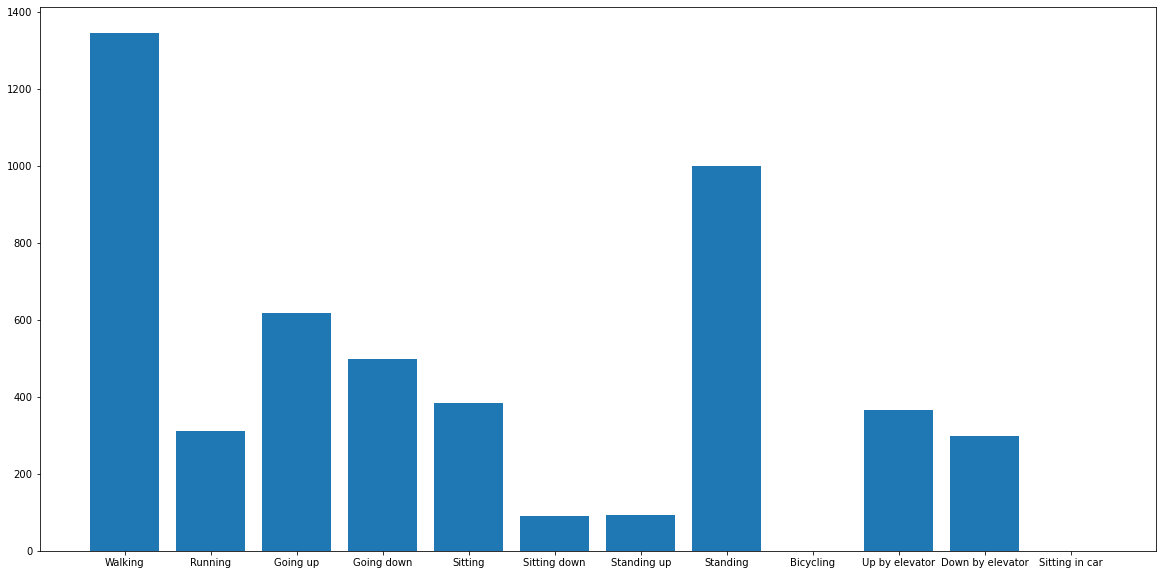

In [12]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']

y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 50 Hidden neurons ============


loss 1.04838 acc 0.45875: 100%|█████████▉| 499/500 [00:36<00:00, 14.05it/s]

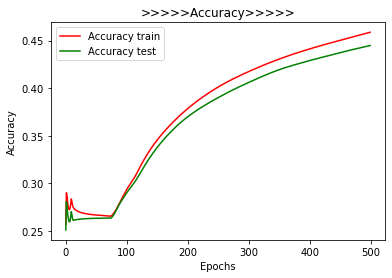

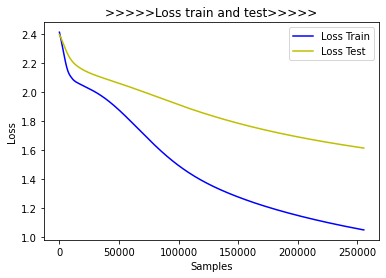

Accuracy de validación con kFold 0.5162760416666667
Accuracy Train: 0.535 
Accuracy Test: 0.536 
Diferencia entre train y test: -0.0010000000000000009

 


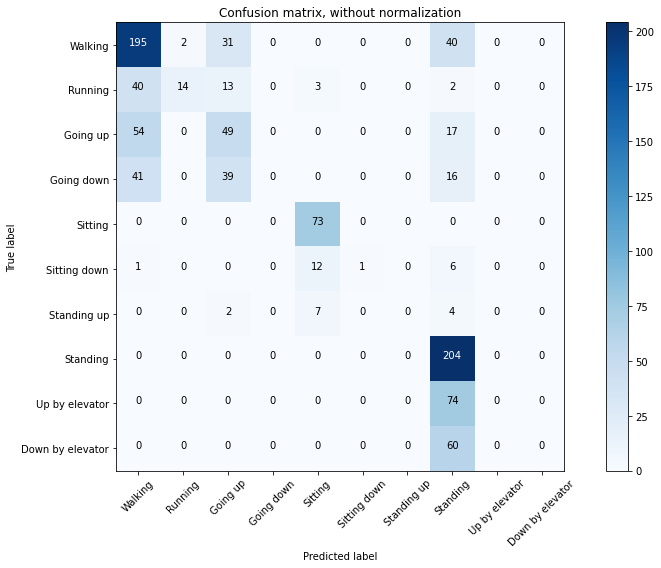

loss 1.06011 acc 0.43821: 100%|█████████▉| 499/500 [00:36<00:00, 13.89it/s]

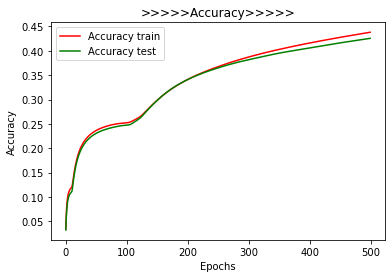

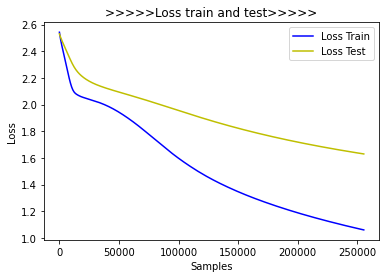

Accuracy de validación con kFold 0.5146484375
Accuracy Train: 0.542 
Accuracy Test: 0.544 
Diferencia entre train y test: -0.0020000000000000018

 


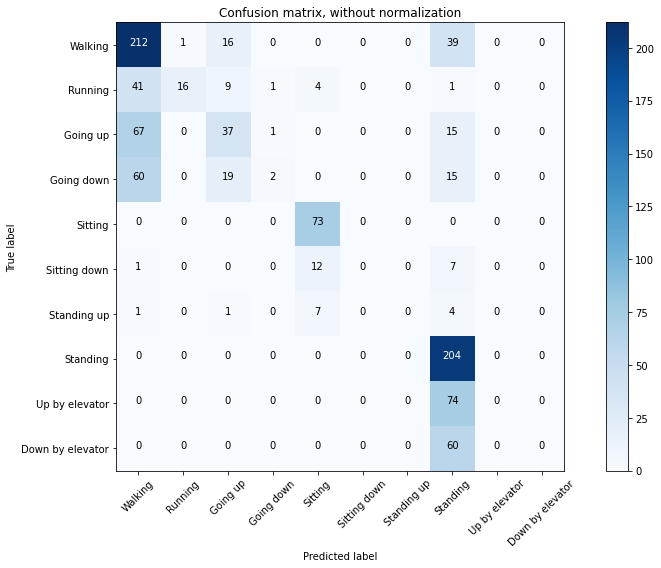

loss 1.06751 acc 0.44702: 100%|██████████| 500/500 [00:36<00:00, 13.51it/s]

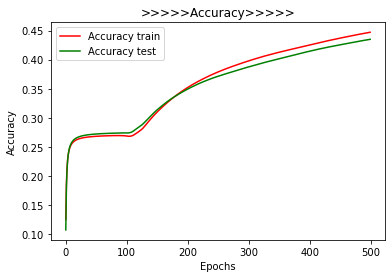

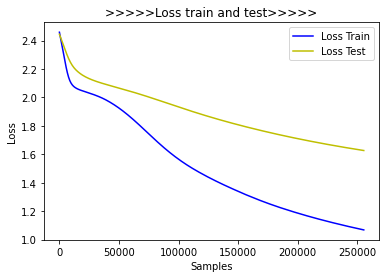

Accuracy de validación con kFold 0.5167100694444445
Accuracy Train: 0.54325 
Accuracy Test: 0.546 
Diferencia entre train y test: -0.00275000000000003

 


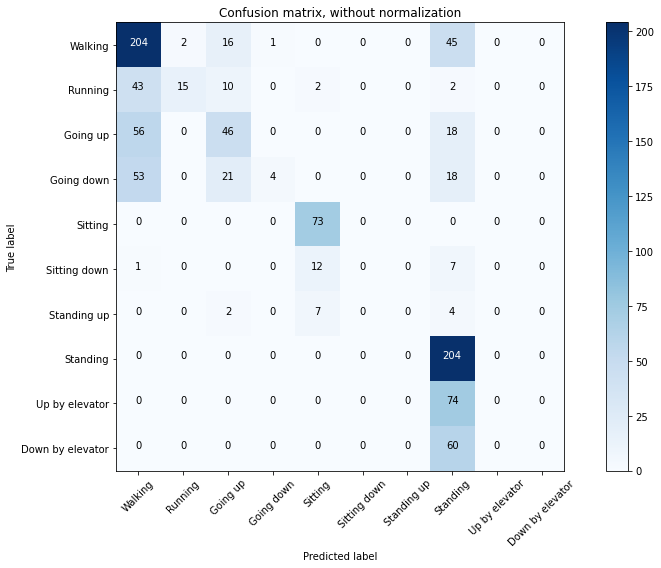

loss 0.97898 acc 0.47289: 100%|██████████| 500/500 [00:36<00:00, 14.01it/s]

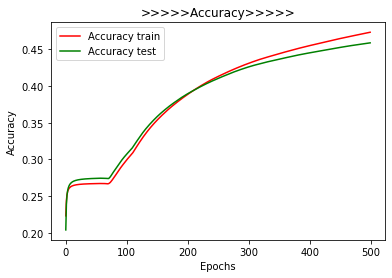

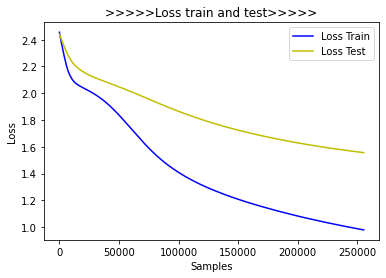

Accuracy de validación con kFold 0.5171440972222223
Accuracy Train: 0.55175 
Accuracy Test: 0.544 
Diferencia entre train y test: 0.007749999999999924

 


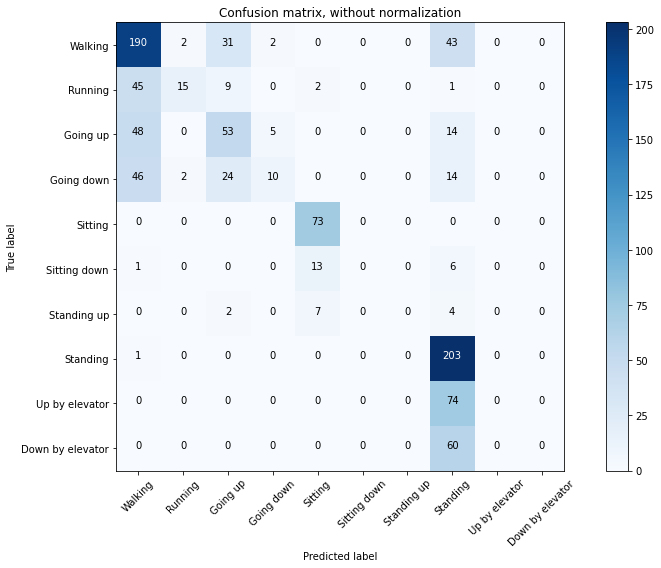

loss 1.09071 acc 0.45738: 100%|██████████| 500/500 [00:36<00:00, 12.77it/s]

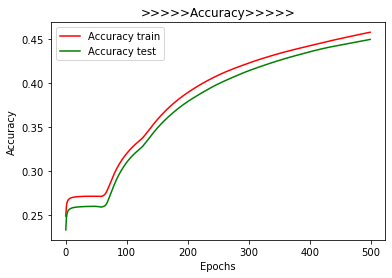

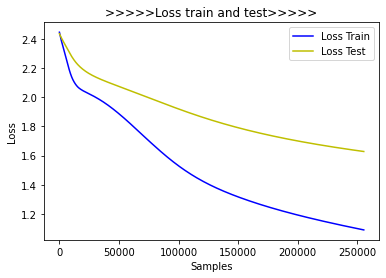

Accuracy de validación con kFold 0.5161458333333334
Accuracy Train: 0.528 
Accuracy Test: 0.53 
Diferencia entre train y test: -0.0020000000000000018

 


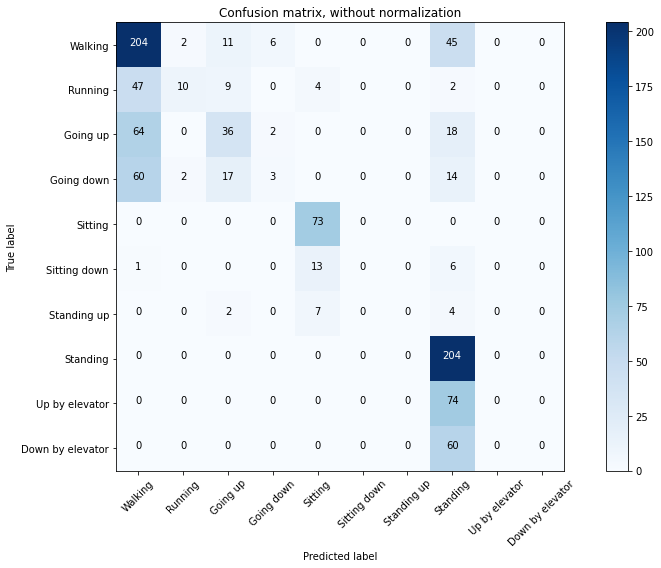

loss 1.04800 acc 0.44980: 100%|██████████| 500/500 [00:36<00:00, 13.63it/s]

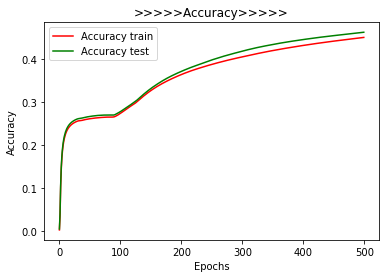

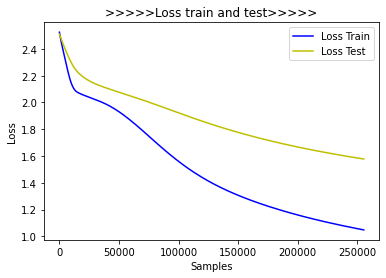

Accuracy de validación con kFold 0.5205078125
Accuracy Train: 0.5335 
Accuracy Test: 0.529 
Diferencia entre train y test: 0.0044999999999999485

 


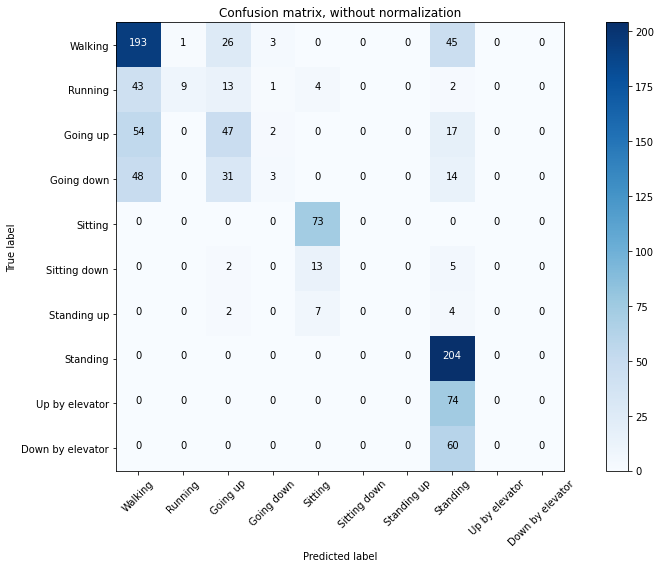

loss 1.02128 acc 0.47479: 100%|██████████| 500/500 [00:37<00:00, 13.38it/s]

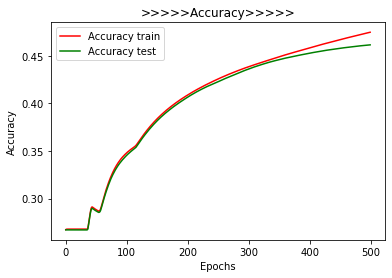

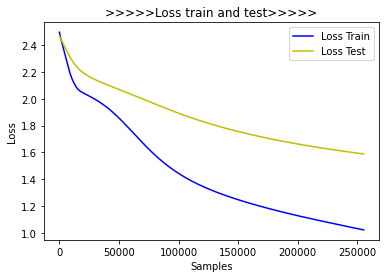

Accuracy de validación con kFold 0.5168960813492064
Accuracy Train: 0.541 
Accuracy Test: 0.542 
Diferencia entre train y test: -0.0010000000000000009

 


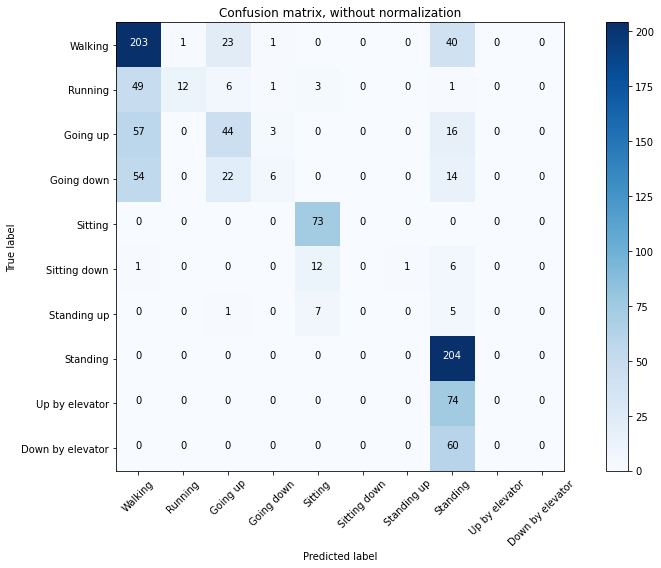

loss 1.05432 acc 0.45393: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]

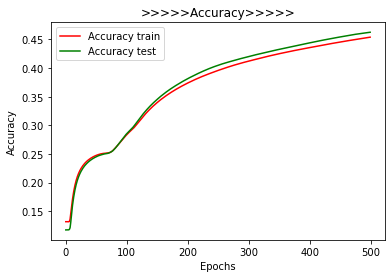

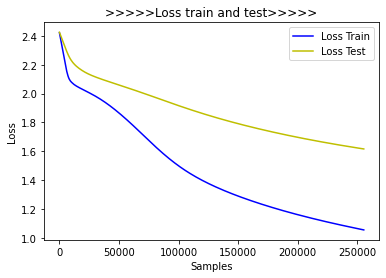

Accuracy de validación con kFold 0.5190700954861112
Accuracy Train: 0.53825 
Accuracy Test: 0.541 
Diferencia entre train y test: -0.00275000000000003

 


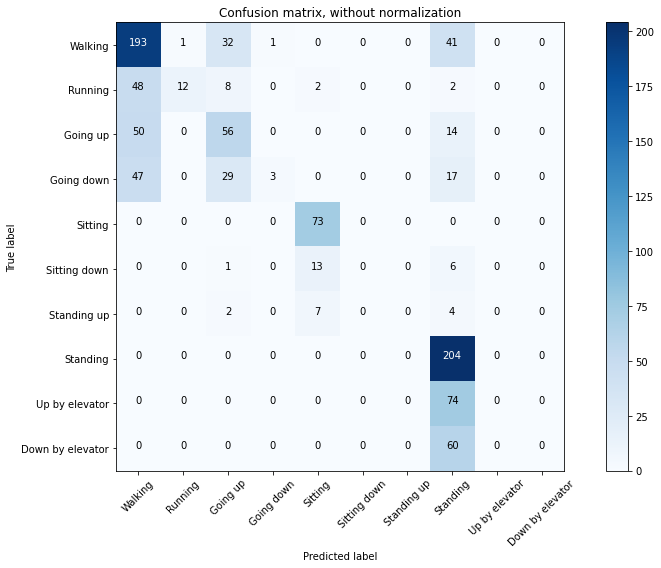

loss 1.05593 acc 0.45685: 100%|██████████| 500/500 [00:37<00:00, 13.42it/s]

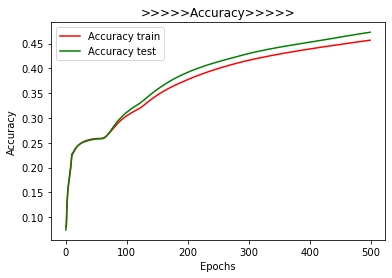

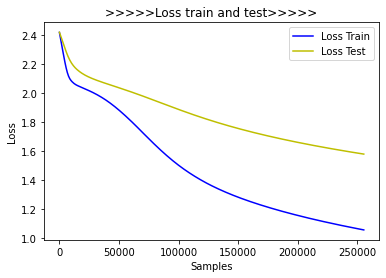

Accuracy de validación con kFold 0.5244020061728396
Accuracy Train: 0.5395 
Accuracy Test: 0.538 
Diferencia entre train y test: 0.0014999999999999458

 


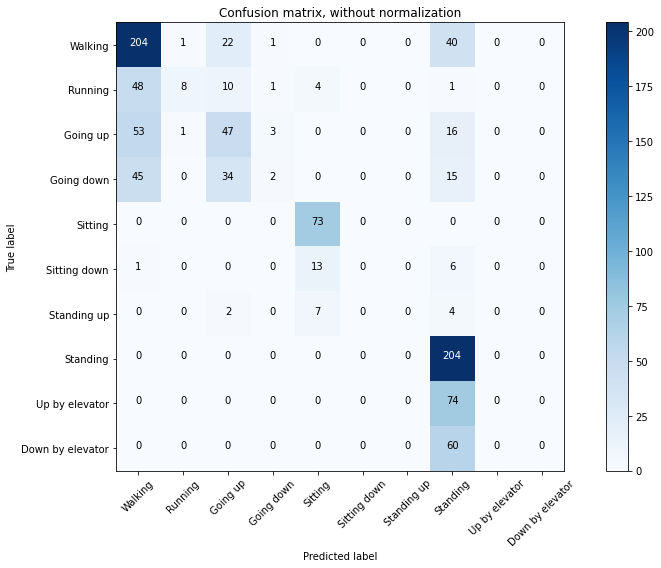

loss 1.07652 acc 0.44236: 100%|██████████| 500/500 [00:38<00:00, 13.64it/s]

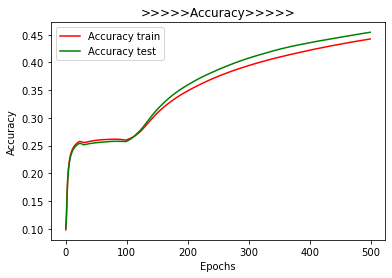

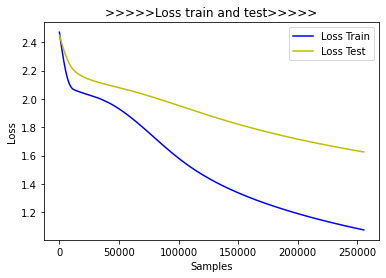

Accuracy de validación con kFold 0.5258246527777779
Accuracy Train: 0.53 
Accuracy Test: 0.541 
Diferencia entre train y test: -0.01100000000000001

 


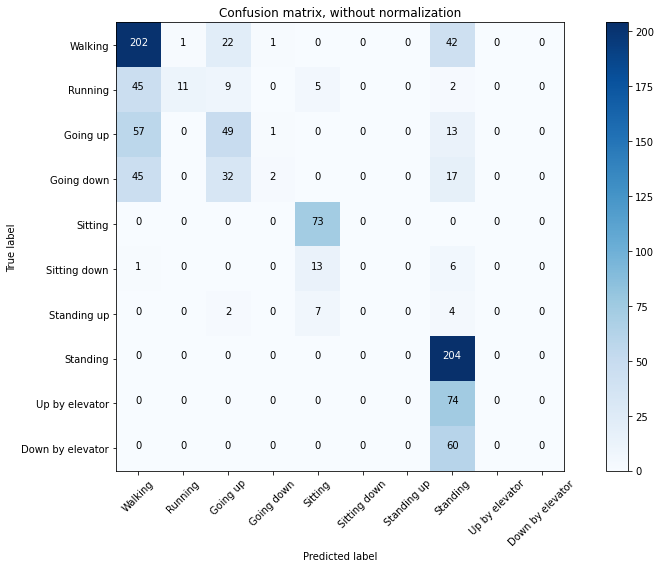

loss 2.45034 acc 0.09642:   0%|          | 2/500 [00:00<00:43, 11.33it/s]

Time: 6m 46.40625s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 150 Hidden neurons ============


loss 0.79270 acc 0.51792: 100%|██████████| 500/500 [00:36<00:00, 13.74it/s]

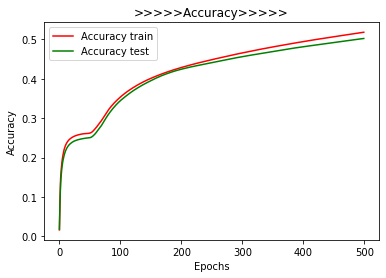

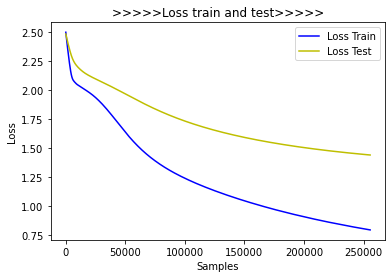

Accuracy de validación con kFold 0.6011284722222222
Accuracy Train: 0.6165 
Accuracy Test: 0.603 
Diferencia entre train y test: 0.013500000000000068

 


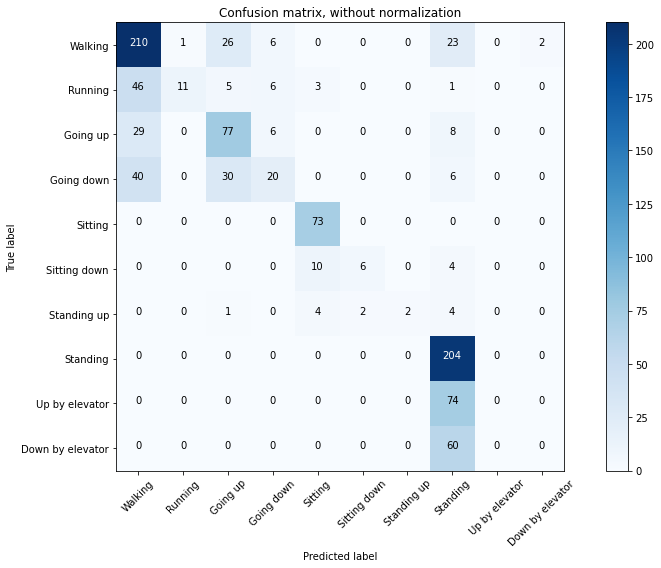

loss 0.81590 acc 0.49898: 100%|██████████| 500/500 [00:37<00:00, 13.56it/s]

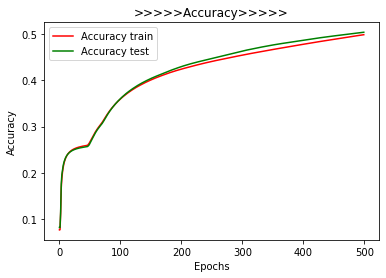

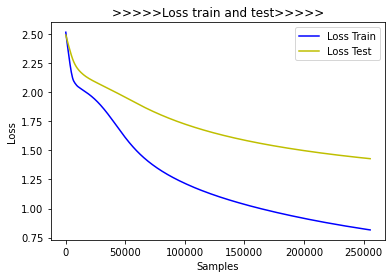

Accuracy de validación con kFold 0.5929904513888888
Accuracy Train: 0.58975 
Accuracy Test: 0.595 
Diferencia entre train y test: -0.005249999999999977

 


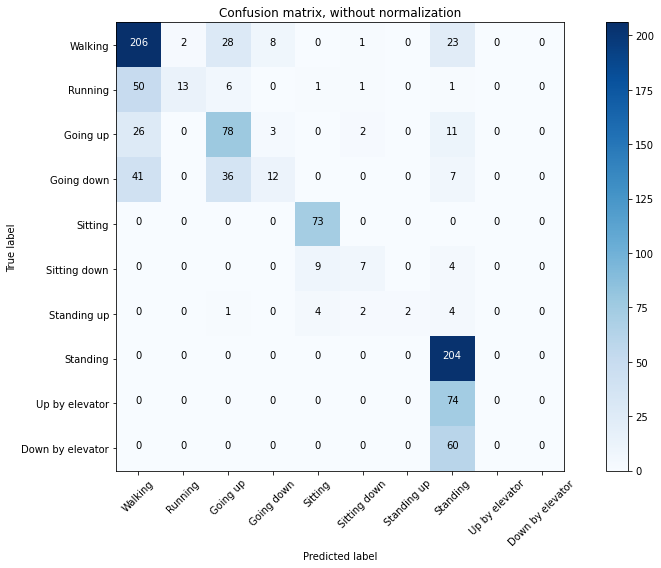

loss 0.71716 acc 0.52535: 100%|██████████| 500/500 [00:37<00:00, 12.93it/s]

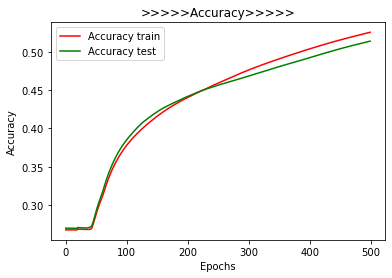

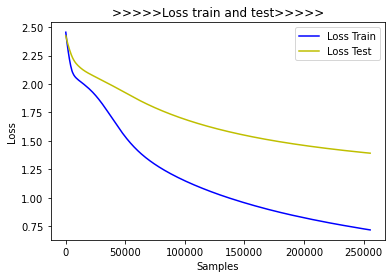

Accuracy de validación con kFold 0.5980902777777778
Accuracy Train: 0.61725 
Accuracy Test: 0.605 
Diferencia entre train y test: 0.012249999999999983

 


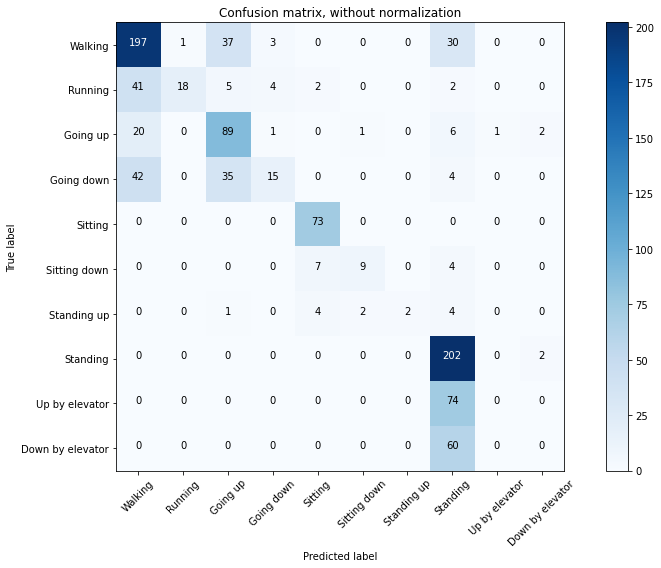

loss 0.75506 acc 0.51488: 100%|█████████▉| 499/500 [00:37<00:00, 13.23it/s]

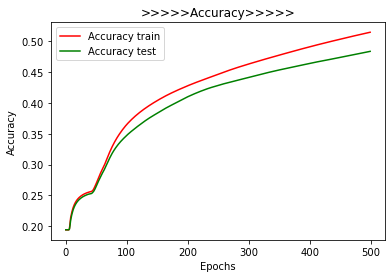

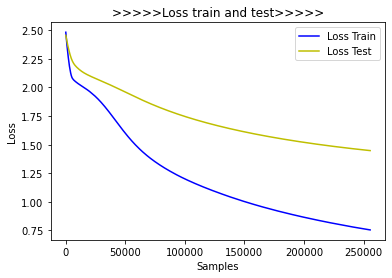

Accuracy de validación con kFold 0.5944552951388888
Accuracy Train: 0.62025 
Accuracy Test: 0.612 
Diferencia entre train y test: 0.00824999999999998

 


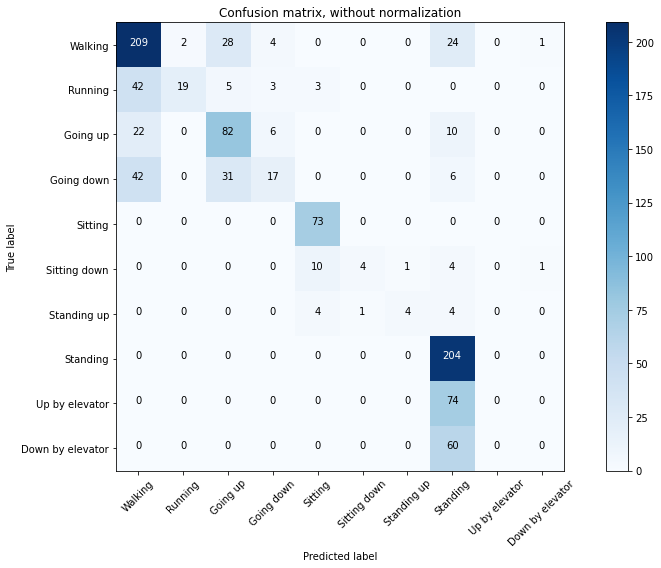

loss 0.76815 acc 0.51407: 100%|██████████| 500/500 [00:39<00:00, 13.08it/s]

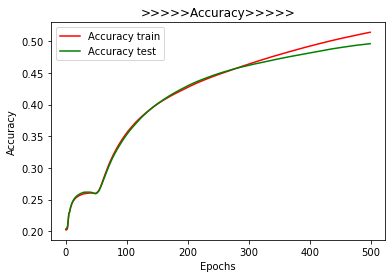

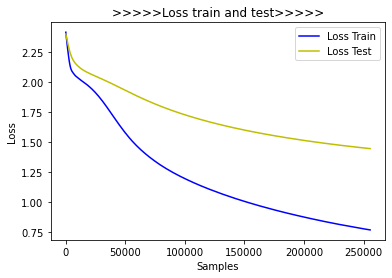

Accuracy de validación con kFold 0.5862847222222222
Accuracy Train: 0.6015 
Accuracy Test: 0.605 
Diferencia entre train y test: -0.0034999999999999476

 


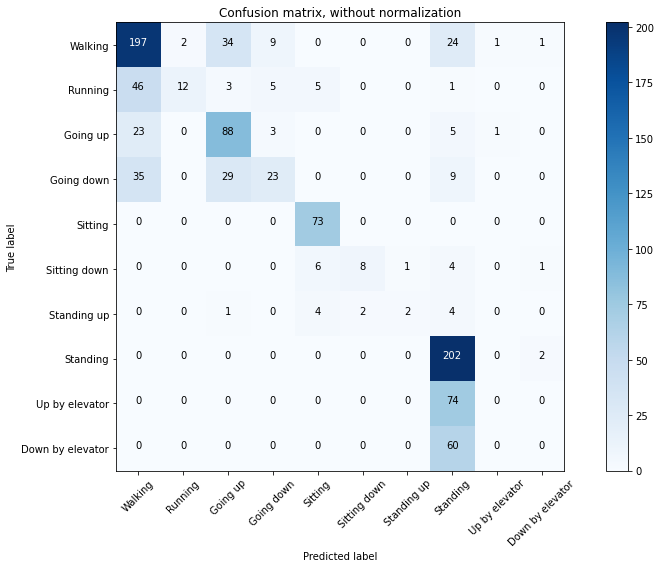

loss 0.73938 acc 0.52754: 100%|█████████▉| 499/500 [00:38<00:00, 12.23it/s]

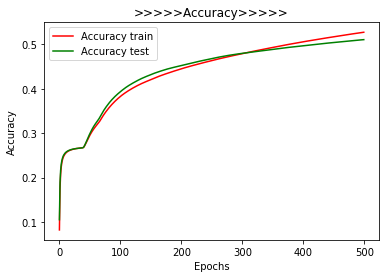

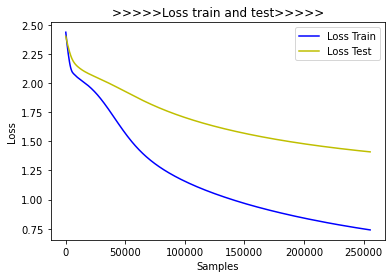

Accuracy de validación con kFold 0.5828993055555555
Accuracy Train: 0.6185 
Accuracy Test: 0.625 
Diferencia entre train y test: -0.00649999999999995

 


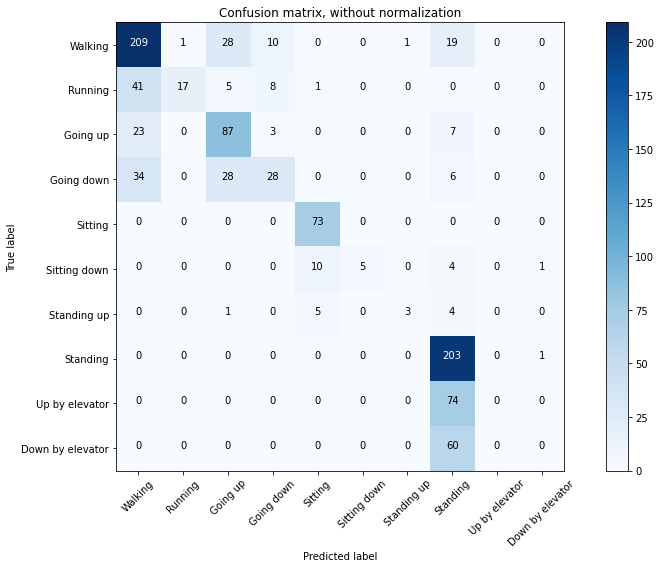

loss 0.79389 acc 0.50557: 100%|██████████| 500/500 [00:37<00:00, 12.78it/s]

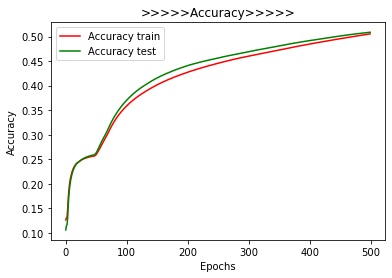

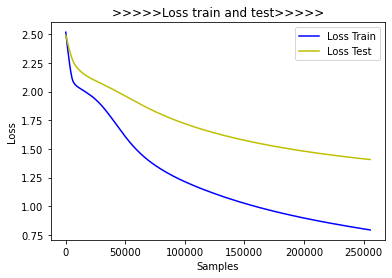

Accuracy de validación con kFold 0.5826512896825397
Accuracy Train: 0.59375 
Accuracy Test: 0.595 
Diferencia entre train y test: -0.0012499999999999734

 


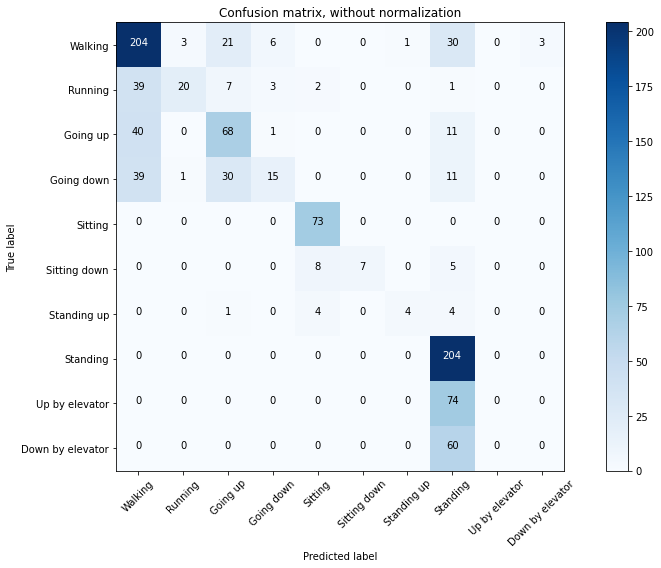

loss 0.74718 acc 0.52982: 100%|██████████| 500/500 [00:37<00:00, 12.75it/s]

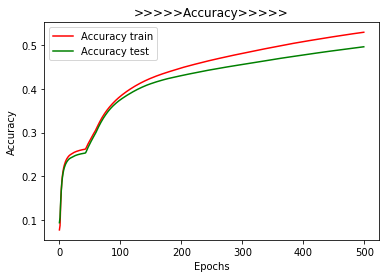

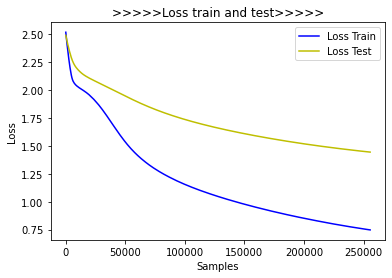

Accuracy de validación con kFold 0.5828450520833333
Accuracy Train: 0.616 
Accuracy Test: 0.623 
Diferencia entre train y test: -0.007000000000000006

 


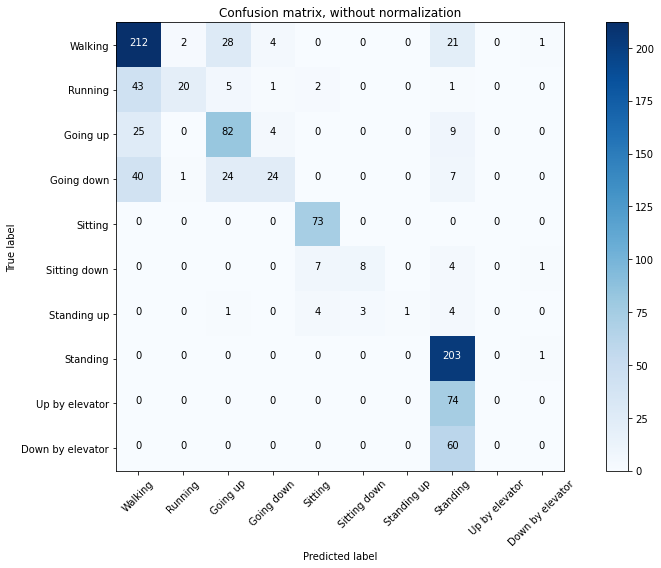

loss 0.82585 acc 0.50741: 100%|██████████| 500/500 [00:36<00:00, 13.05it/s]

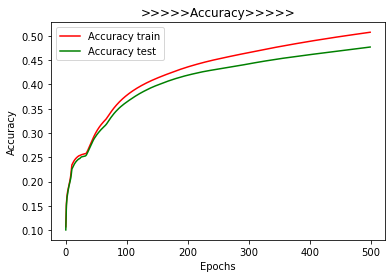

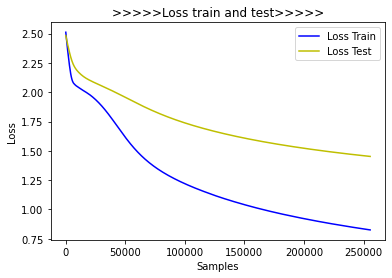

Accuracy de validación con kFold 0.5801745756172839
Accuracy Train: 0.5885 
Accuracy Test: 0.595 
Diferencia entre train y test: -0.00649999999999995

 


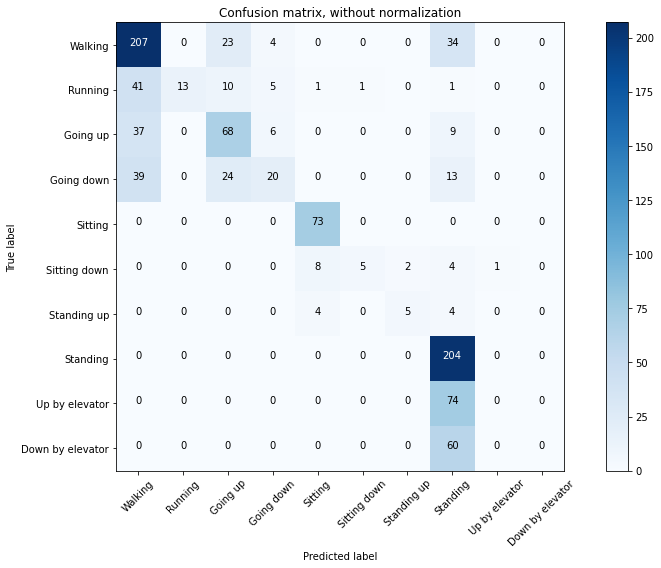

loss 0.79680 acc 0.50942: 100%|██████████| 500/500 [00:36<00:00, 13.19it/s]

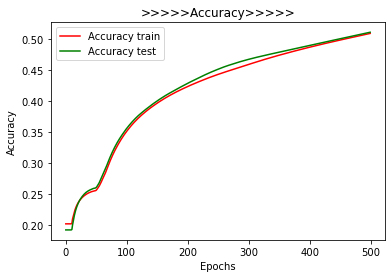

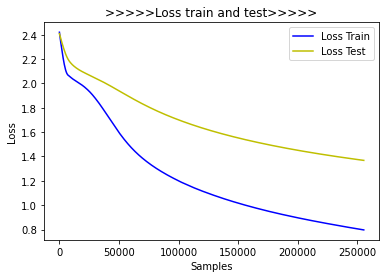

Accuracy de validación con kFold 0.5838324652777778
Accuracy Train: 0.602 
Accuracy Test: 0.611 
Diferencia entre train y test: -0.009000000000000008

 


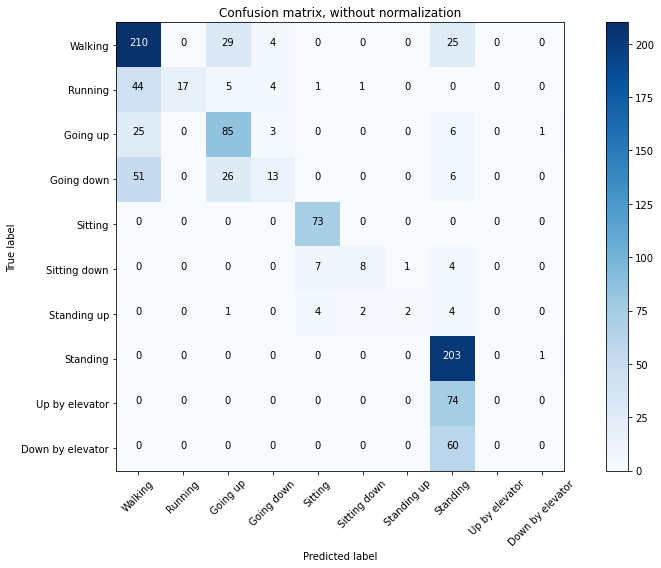

loss 2.39432 acc 0.19434:   0%|          | 2/500 [00:00<00:41, 12.01it/s]

Time: 6m 51.28125s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 250 Hidden neurons ============


loss 0.64998 acc 0.54951: 100%|██████████| 500/500 [00:36<00:00, 13.25it/s]

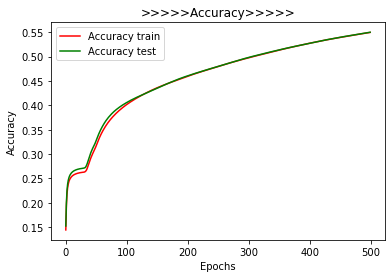

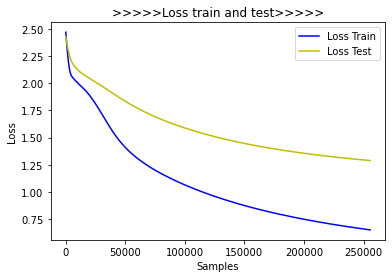

Accuracy de validación con kFold 0.6547309027777778
Accuracy Train: 0.643 
Accuracy Test: 0.637 
Diferencia entre train y test: 0.006000000000000005

 


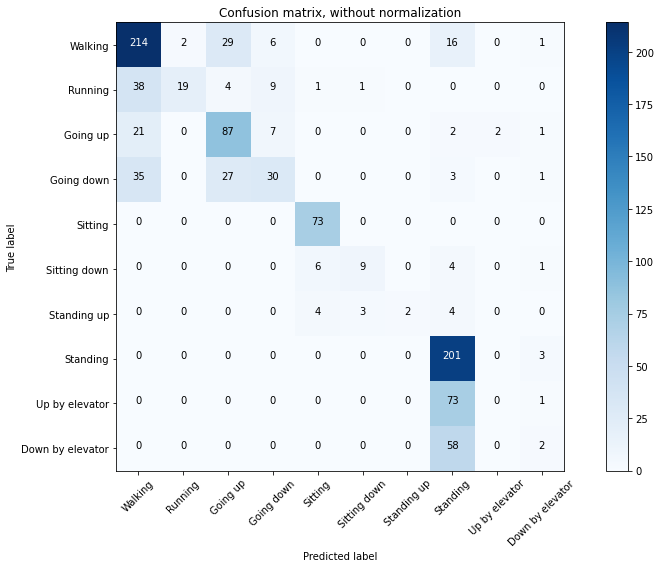

loss 0.65272 acc 0.54605: 100%|██████████| 500/500 [00:36<00:00, 13.24it/s]

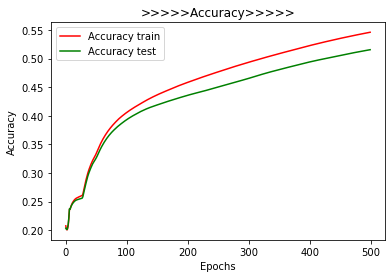

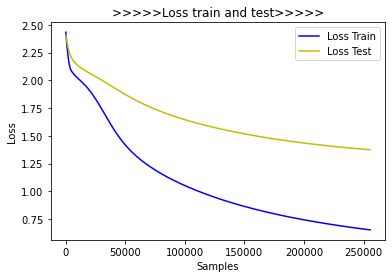

Accuracy de validación con kFold 0.6316189236111112
Accuracy Train: 0.64625 
Accuracy Test: 0.639 
Diferencia entre train y test: 0.007249999999999979

 


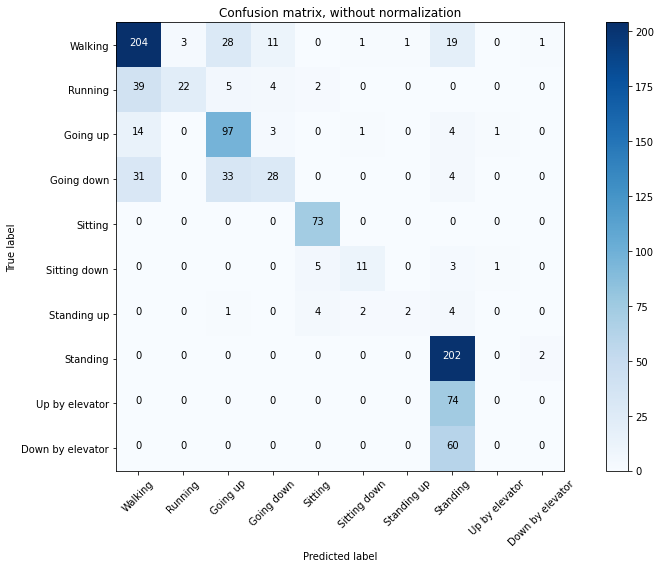

loss 0.67626 acc 0.54414: 100%|██████████| 500/500 [00:36<00:00, 12.84it/s]

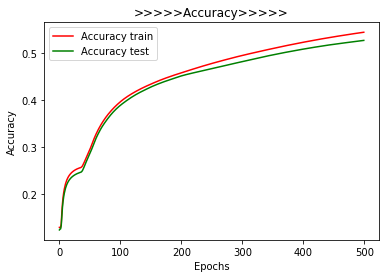

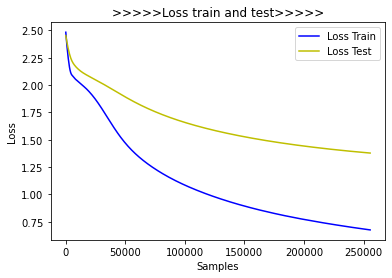

Accuracy de validación con kFold 0.6241319444444445
Accuracy Train: 0.63075 
Accuracy Test: 0.63 
Diferencia entre train y test: 0.0007500000000000284

 


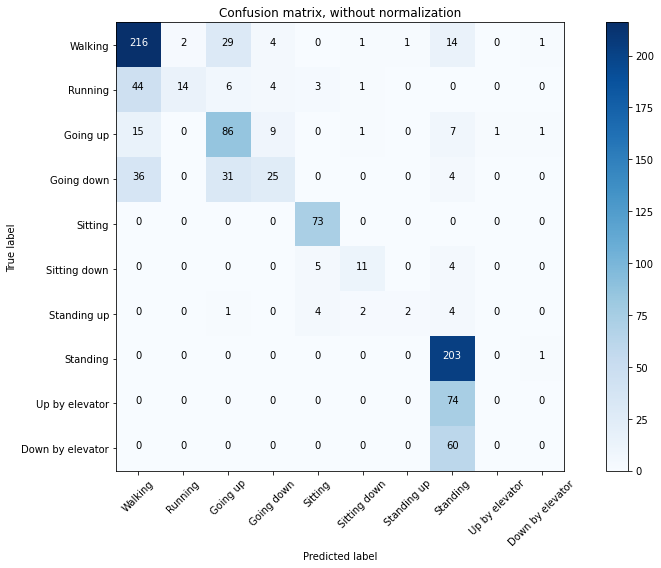

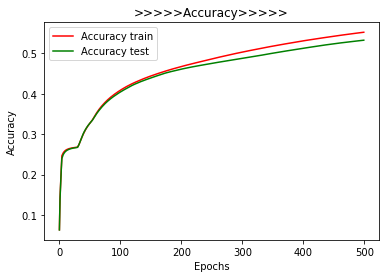

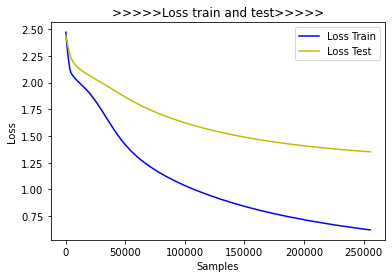

Accuracy de validación con kFold 0.6227213541666667
Accuracy Train: 0.641 
Accuracy Test: 0.633 
Diferencia entre train y test: 0.008000000000000007

 


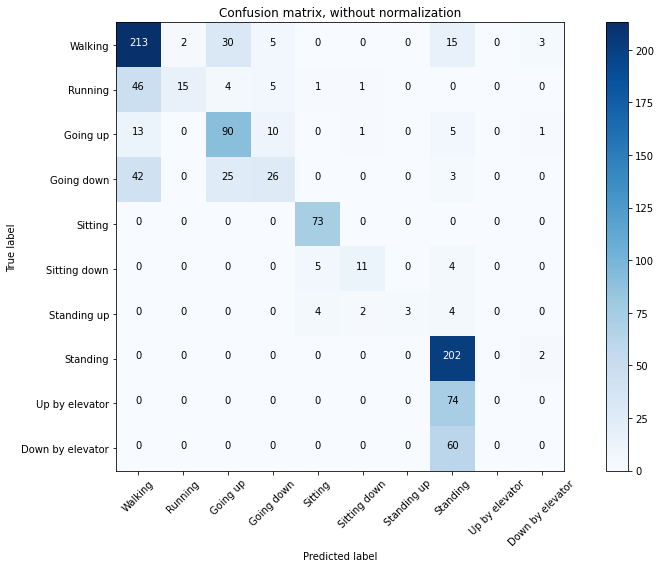

loss 0.64486 acc 0.55002: 100%|██████████| 500/500 [00:38<00:00, 13.00it/s]

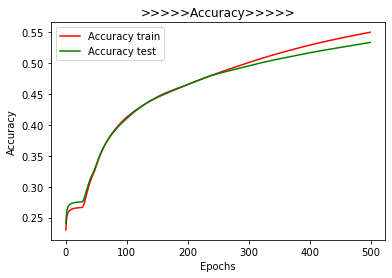

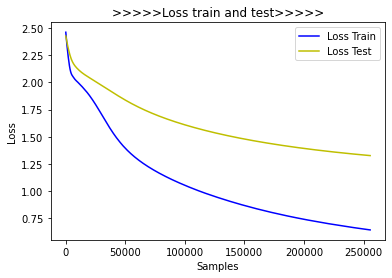

Accuracy de validación con kFold 0.6215277777777779
Accuracy Train: 0.634 
Accuracy Test: 0.645 
Diferencia entre train y test: -0.01100000000000001

 


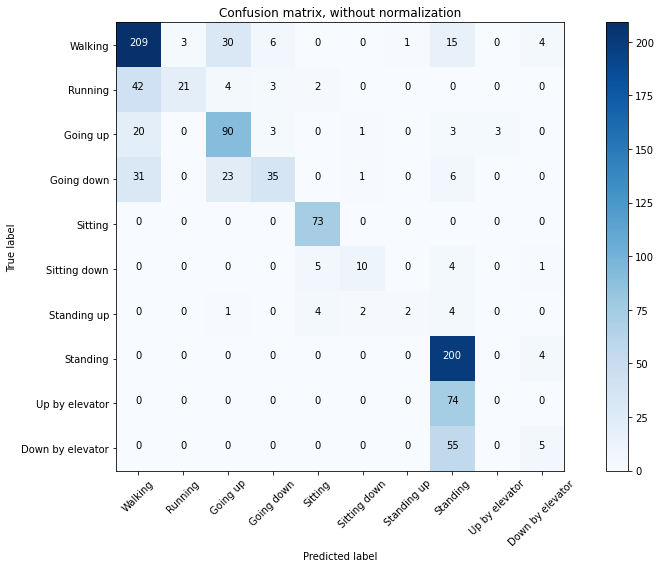

loss 0.64816 acc 0.53818: 100%|█████████▉| 499/500 [00:37<00:00, 13.93it/s]

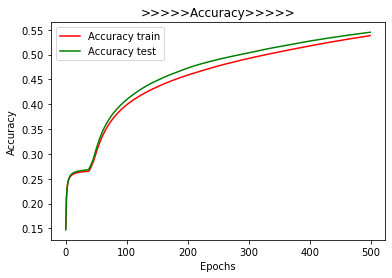

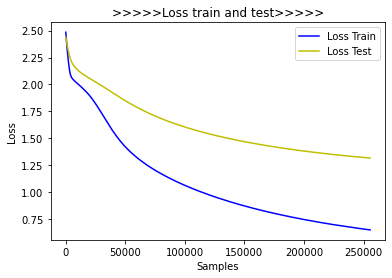

Accuracy de validación con kFold 0.6220703125000001
Accuracy Train: 0.628 
Accuracy Test: 0.623 
Diferencia entre train y test: 0.0050000000000000044

 


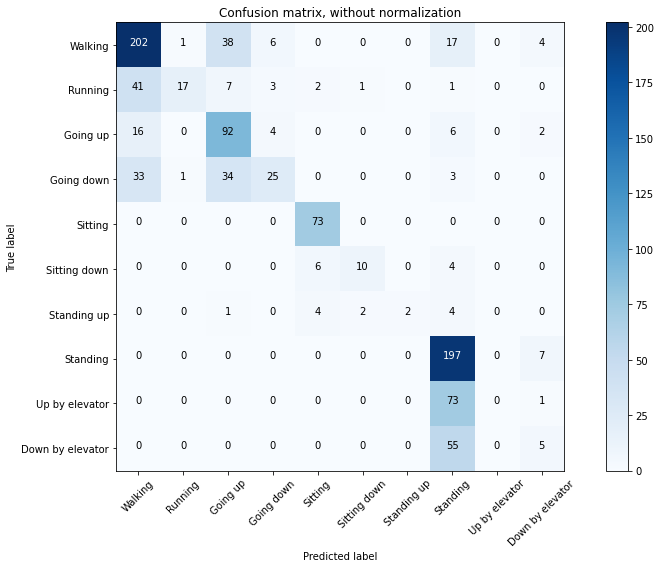

loss 0.65180 acc 0.55498: 100%|██████████| 500/500 [00:36<00:00, 14.11it/s]

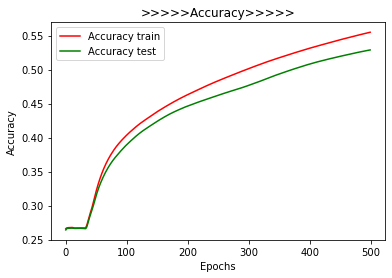

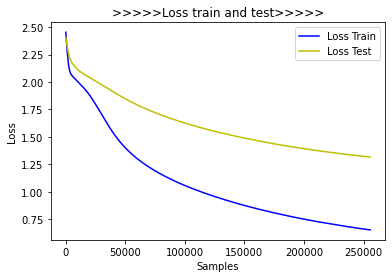

Accuracy de validación con kFold 0.6207217261904763
Accuracy Train: 0.6465 
Accuracy Test: 0.638 
Diferencia entre train y test: 0.008499999999999952

 


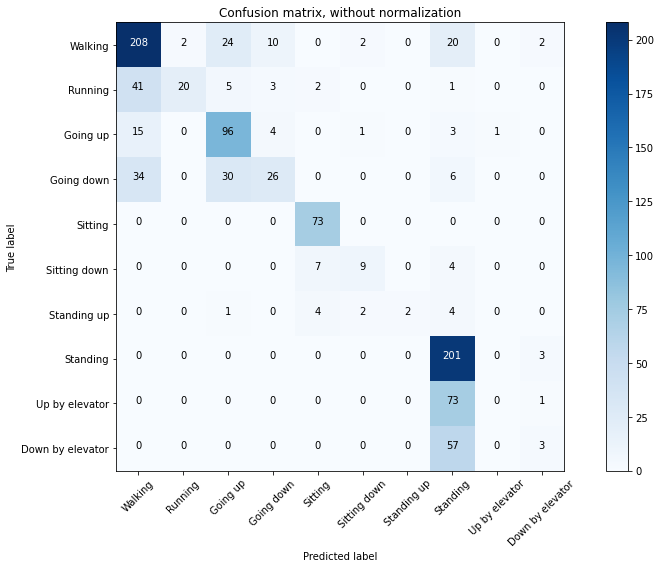

loss 0.66150 acc 0.54317: 100%|██████████| 500/500 [00:36<00:00, 13.89it/s]

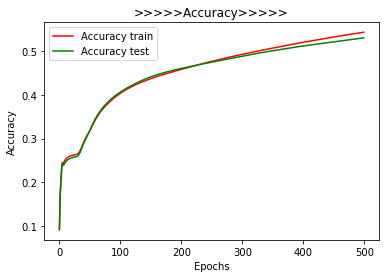

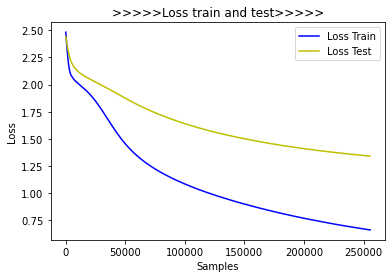

Accuracy de validación con kFold 0.6194390190972223
Accuracy Train: 0.6385 
Accuracy Test: 0.644 
Diferencia entre train y test: -0.00550000000000006

 


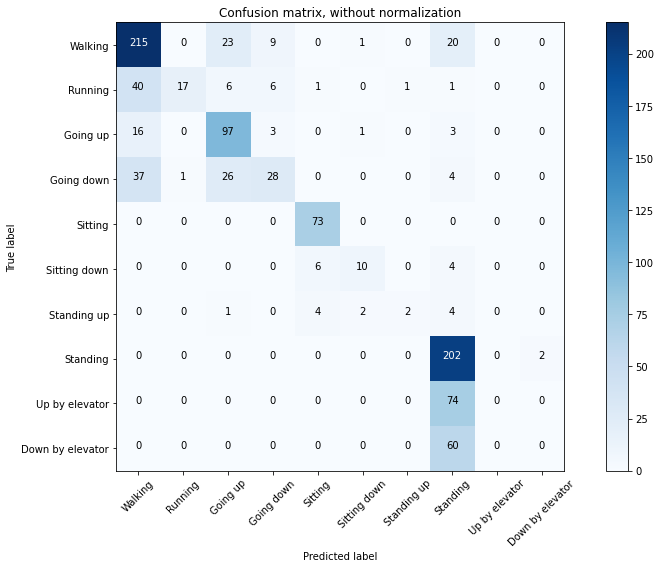

loss 0.62782 acc 0.54364: 100%|█████████▉| 499/500 [00:37<00:00, 13.63it/s]

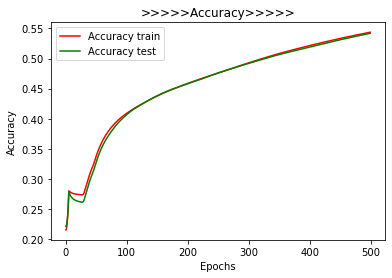

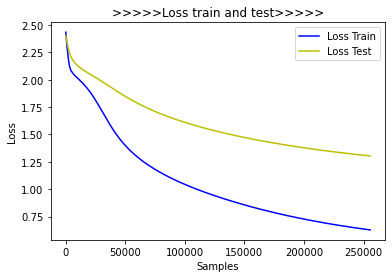

Accuracy de validación con kFold 0.6221305941358026
Accuracy Train: 0.6445 
Accuracy Test: 0.632 
Diferencia entre train y test: 0.012499999999999956

 


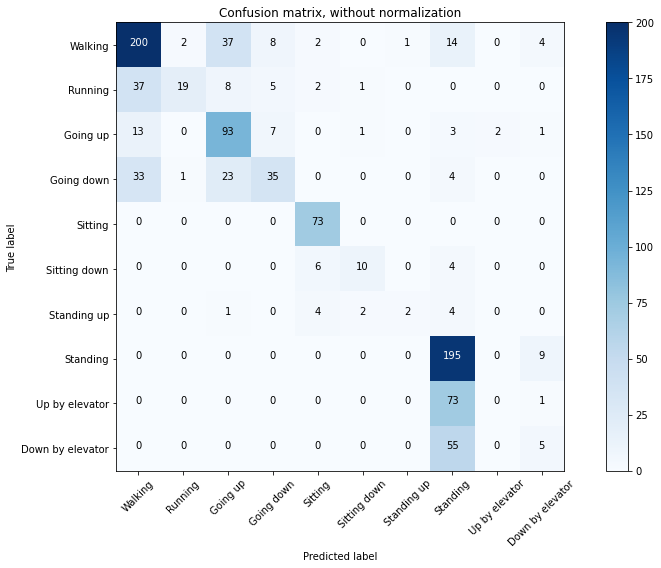

loss 0.65004 acc 0.55900: 100%|██████████| 500/500 [00:37<00:00, 13.59it/s]

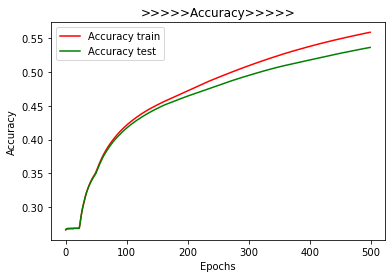

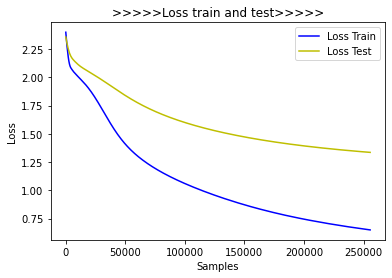

Accuracy de validación con kFold 0.6215277777777779
Accuracy Train: 0.6455 
Accuracy Test: 0.635 
Diferencia entre train y test: 0.010499999999999954

 


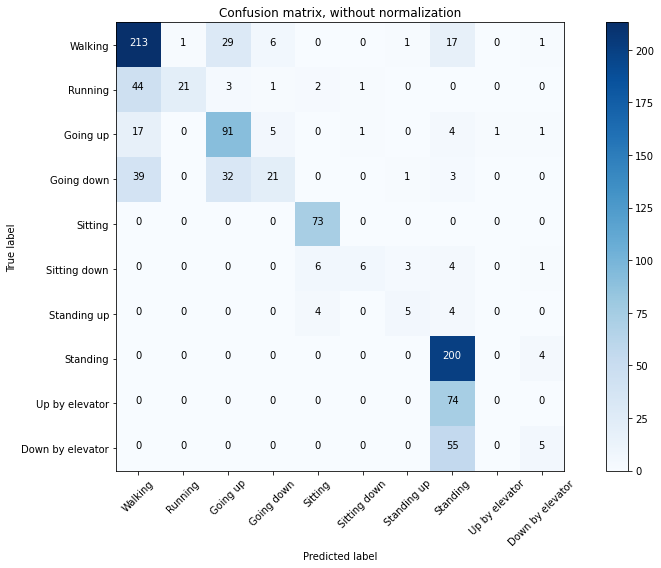

Time: 6m 46.6875s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 350 Hidden neurons ============


loss 0.57176 acc 0.56027: 100%|██████████| 500/500 [00:37<00:00, 13.59it/s]

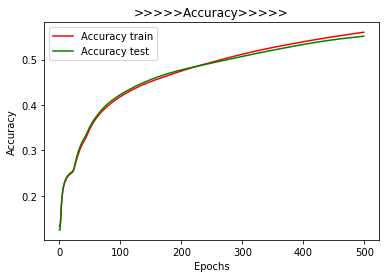

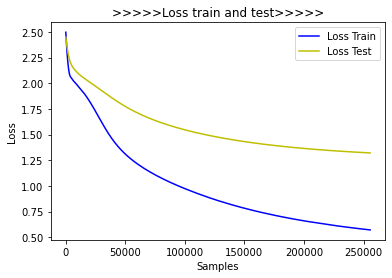

Accuracy de validación con kFold 0.6208767361111112
Accuracy Train: 0.6485 
Accuracy Test: 0.64 
Diferencia entre train y test: 0.008499999999999952

 


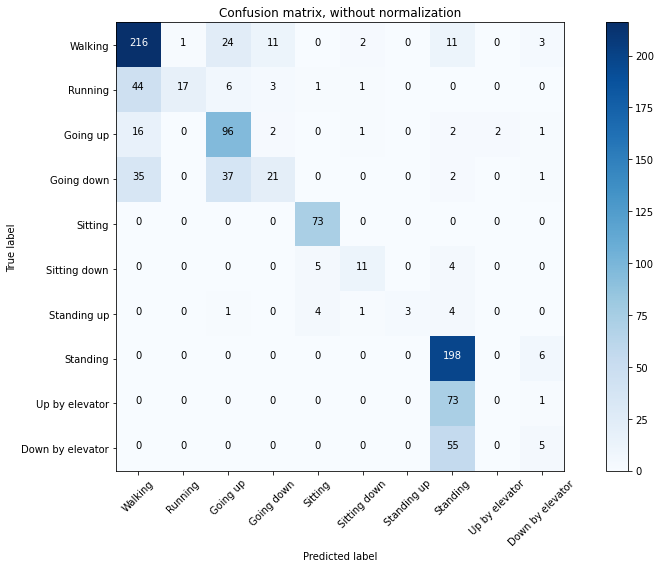

loss 0.55534 acc 0.57162: 100%|█████████▉| 499/500 [00:37<00:00, 13.16it/s]

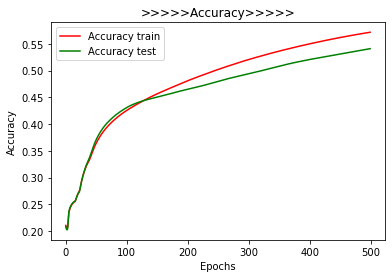

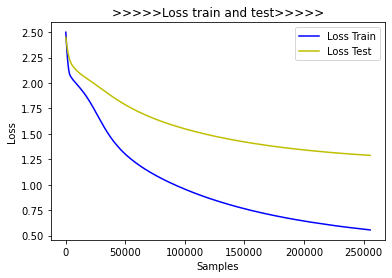

Accuracy de validación con kFold 0.6327039930555556
Accuracy Train: 0.66125 
Accuracy Test: 0.652 
Diferencia entre train y test: 0.00924999999999998

 


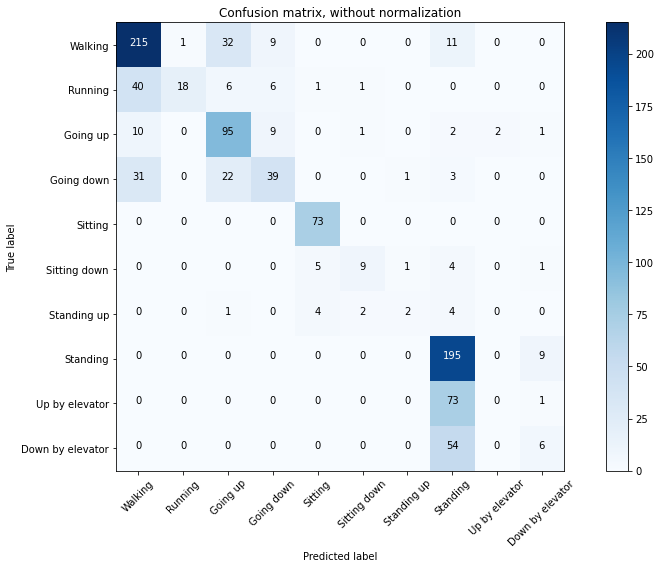

loss 0.56723 acc 0.57754: 100%|██████████| 500/500 [00:37<00:00, 13.49it/s]

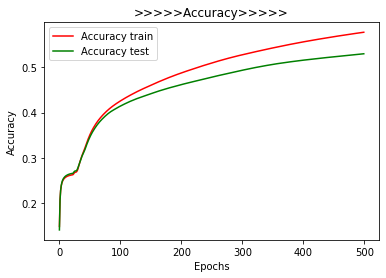

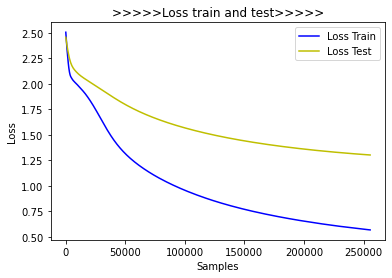

Accuracy de validación con kFold 0.6203703703703703
Accuracy Train: 0.65975 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.011749999999999927

 


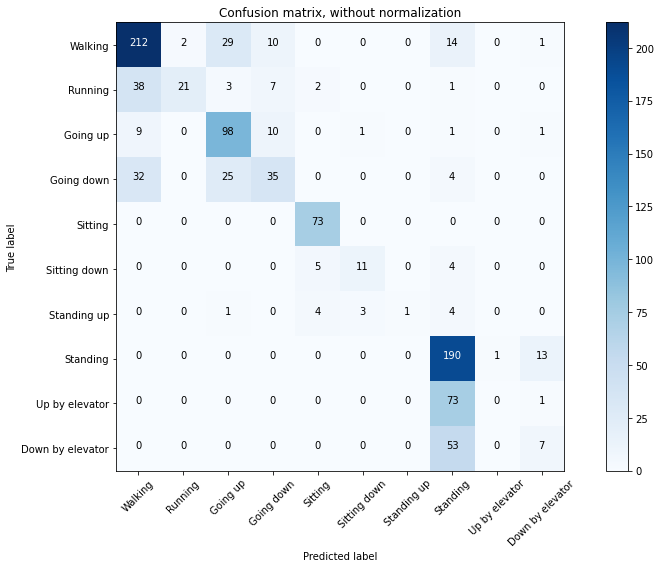

loss 0.58679 acc 0.56568: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]

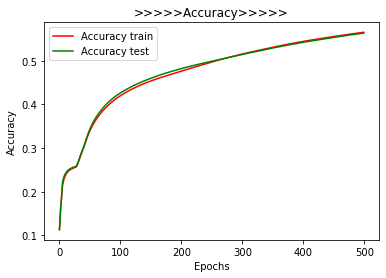

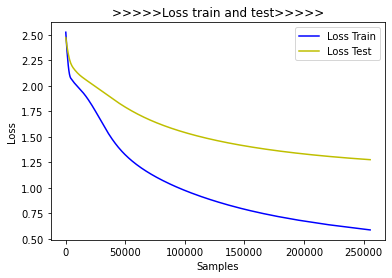

Accuracy de validación con kFold 0.6288519965277778
Accuracy Train: 0.64725 
Accuracy Test: 0.641 
Diferencia entre train y test: 0.006249999999999978

 


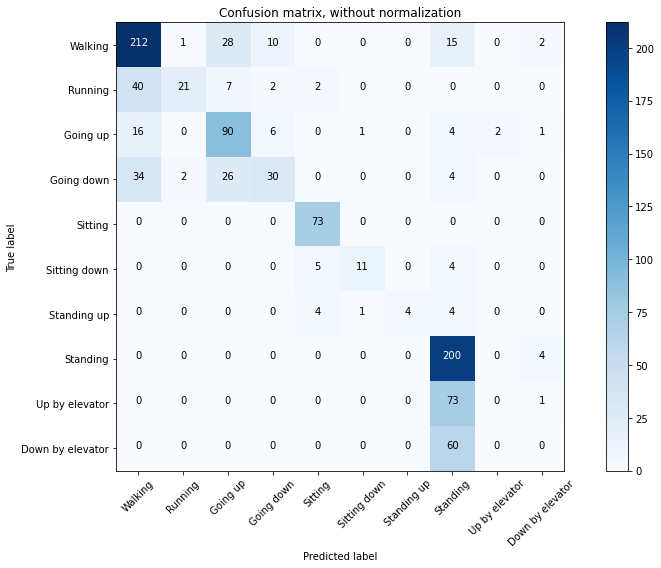

loss 0.53923 acc 0.57125: 100%|██████████| 500/500 [00:37<00:00, 13.23it/s]

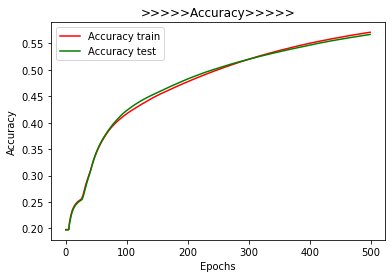

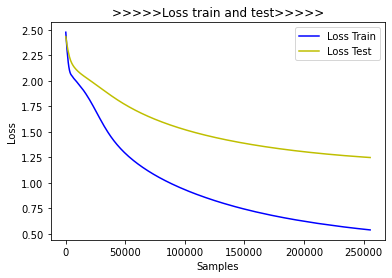

Accuracy de validación con kFold 0.6348524305555555
Accuracy Train: 0.65625 
Accuracy Test: 0.652 
Diferencia entre train y test: 0.004249999999999976

 


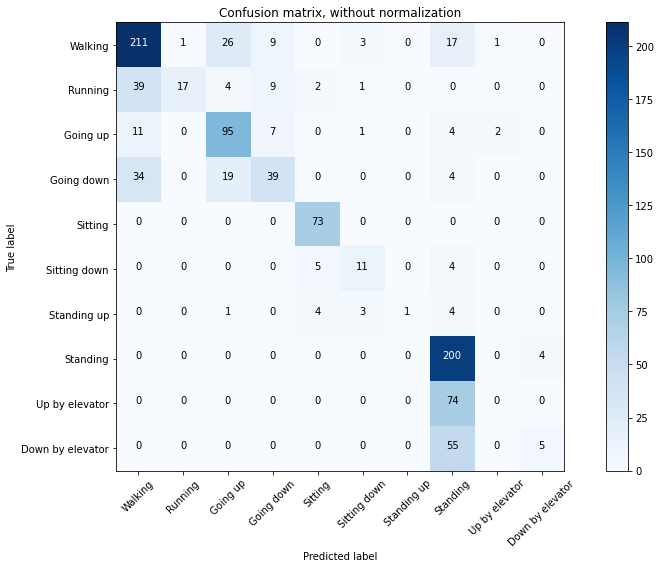

loss 0.56827 acc 0.56519: 100%|██████████| 500/500 [00:37<00:00, 13.49it/s]

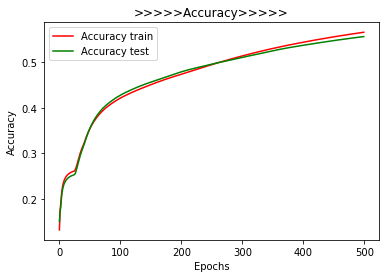

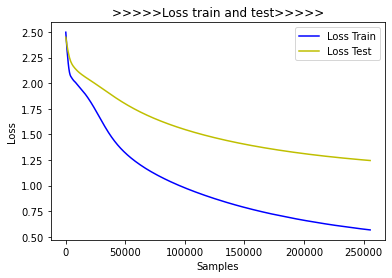

Accuracy de validación con kFold 0.6353443287037037
Accuracy Train: 0.65525 
Accuracy Test: 0.652 
Diferencia entre train y test: 0.003249999999999975

 


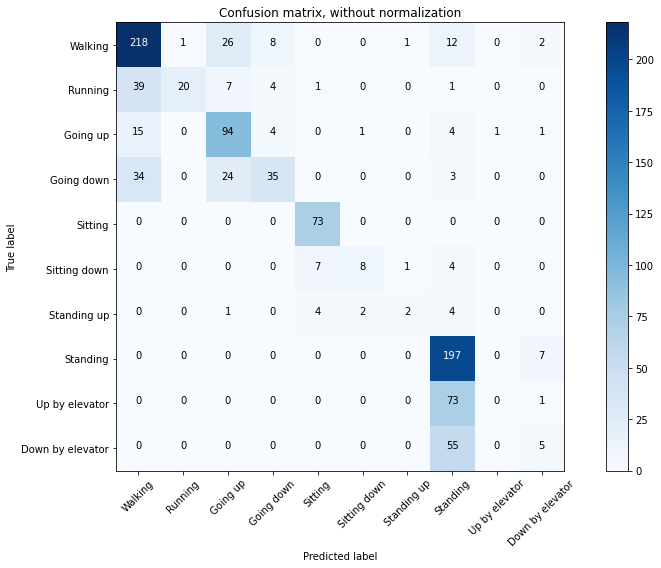

loss 0.59544 acc 0.55527: 100%|██████████| 500/500 [00:38<00:00, 12.58it/s]

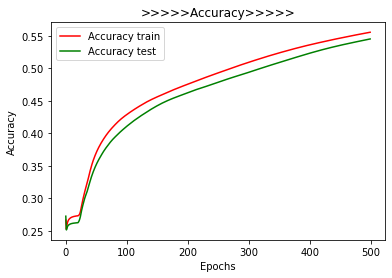

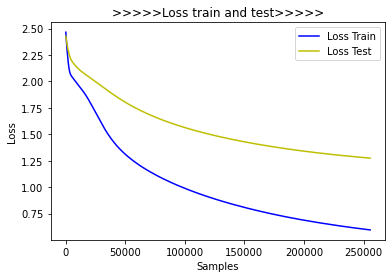

Accuracy de validación con kFold 0.6358816964285714
Accuracy Train: 0.6465 
Accuracy Test: 0.653 
Diferencia entre train y test: -0.006500000000000061

 


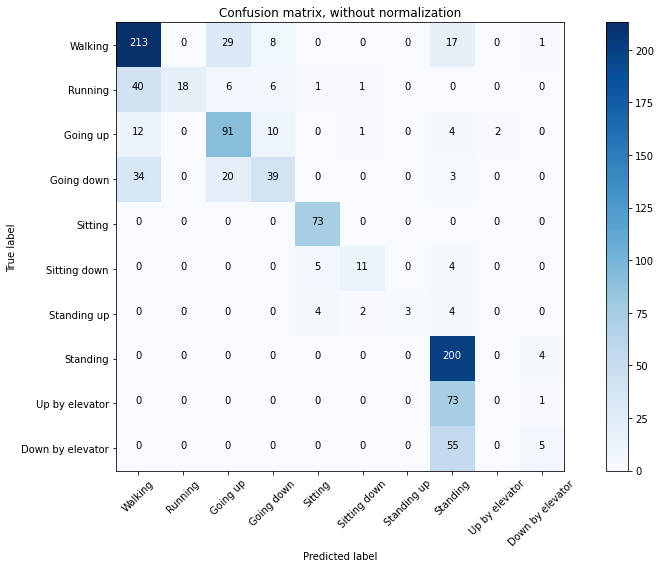

loss 0.58476 acc 0.56733: 100%|██████████| 500/500 [00:38<00:00, 13.28it/s]

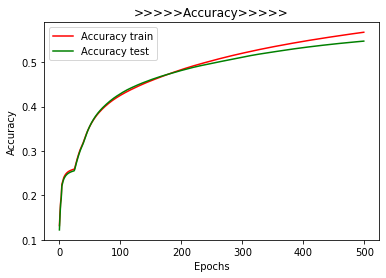

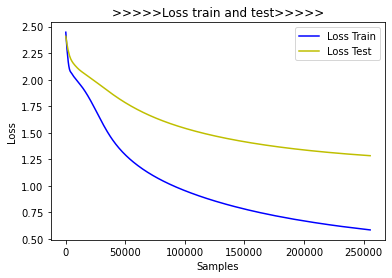

Accuracy de validación con kFold 0.6321885850694444
Accuracy Train: 0.65275 
Accuracy Test: 0.639 
Diferencia entre train y test: 0.01375000000000004

 


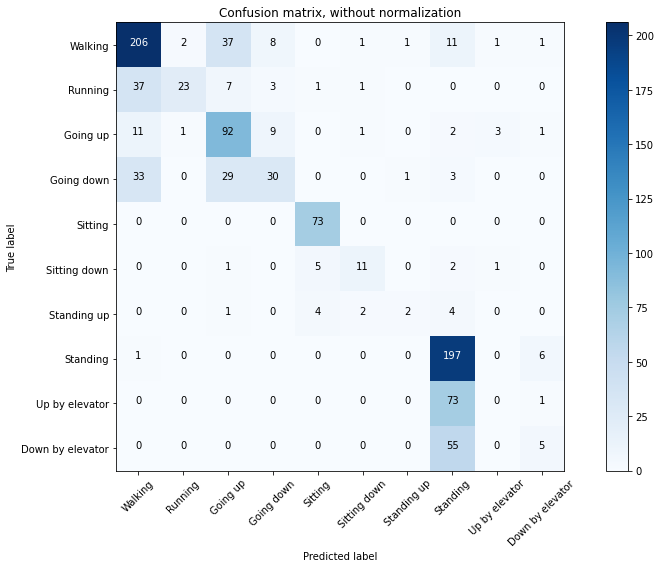

loss 0.57027 acc 0.56827: 100%|██████████| 500/500 [00:37<00:00, 13.26it/s]

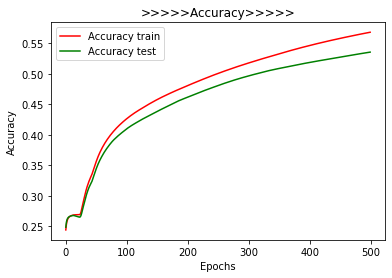

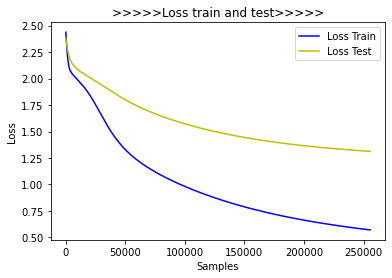

Accuracy de validación con kFold 0.6303288966049383
Accuracy Train: 0.65825 
Accuracy Test: 0.641 
Diferencia entre train y test: 0.017249999999999988

 


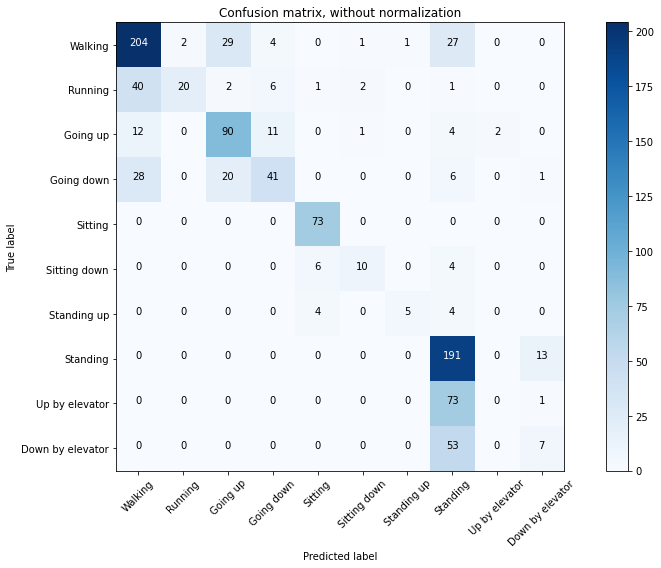

loss 0.63528 acc 0.55630: 100%|██████████| 500/500 [00:37<00:00, 13.21it/s]

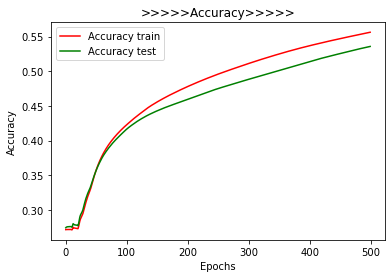

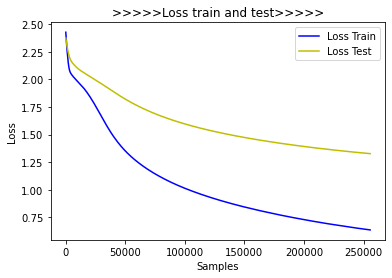

Accuracy de validación con kFold 0.6303385416666667
Accuracy Train: 0.6405 
Accuracy Test: 0.637 
Diferencia entre train y test: 0.0034999999999999476

 


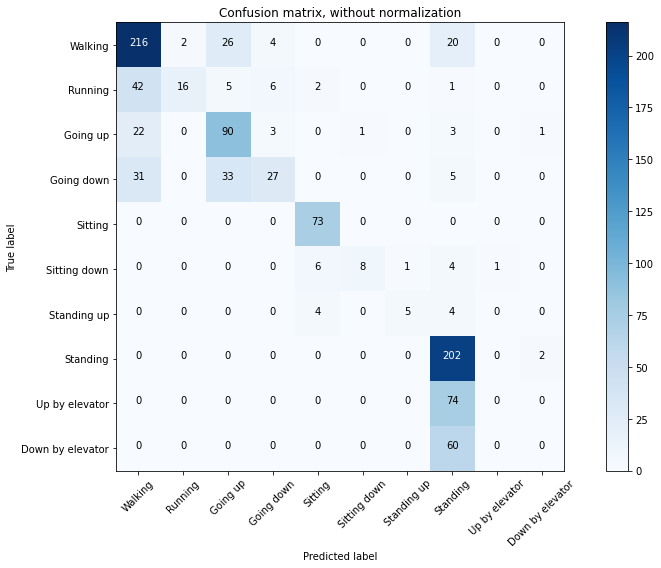

loss 2.46384 acc 0.21081:   0%|          | 1/500 [00:00<00:56,  8.87it/s]

Time: 6m 51.796875s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 450 Hidden neurons ============


loss 0.55243 acc 0.58183: 100%|█████████▉| 499/500 [00:37<00:00, 12.89it/s]

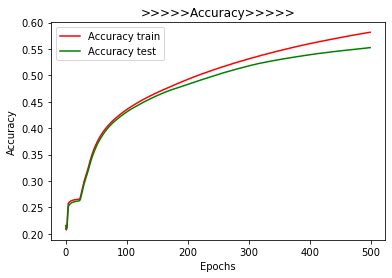

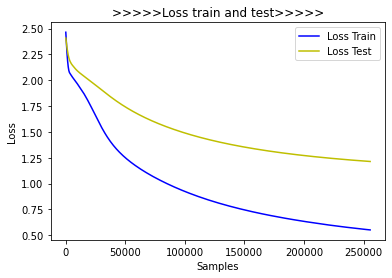

Accuracy de validación con kFold 0.6134982638888888
Accuracy Train: 0.666 
Accuracy Test: 0.652 
Diferencia entre train y test: 0.014000000000000012

 


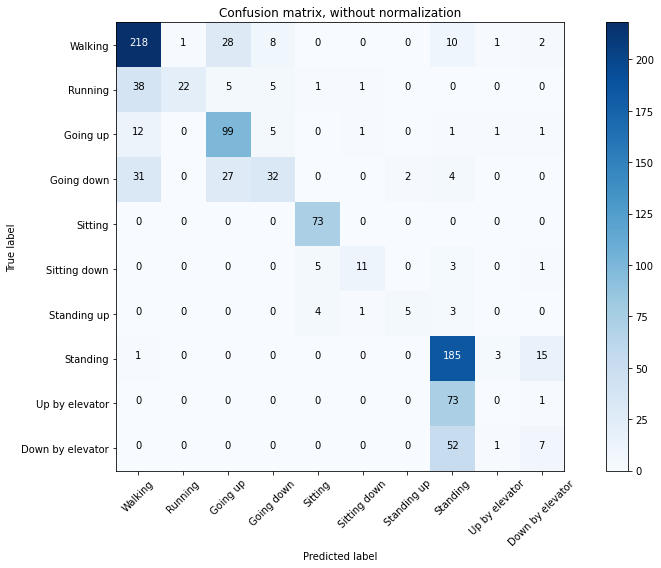

loss 0.53729 acc 0.57869: 100%|██████████| 500/500 [00:37<00:00, 13.07it/s]

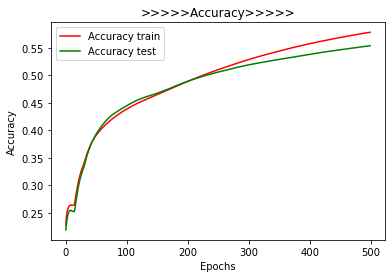

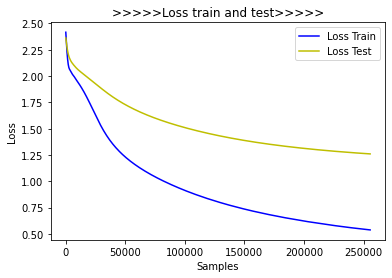

Accuracy de validación con kFold 0.6219618055555556
Accuracy Train: 0.66025 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.012249999999999983

 


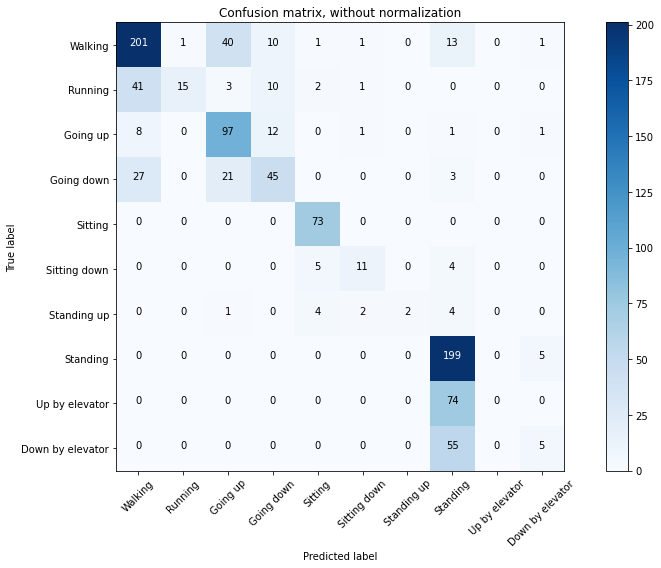

loss 0.51282 acc 0.58523: 100%|██████████| 500/500 [00:37<00:00, 13.09it/s]

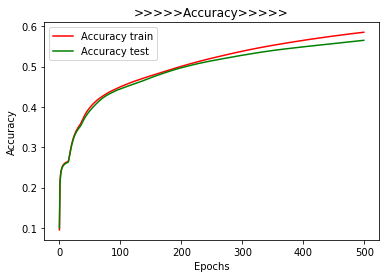

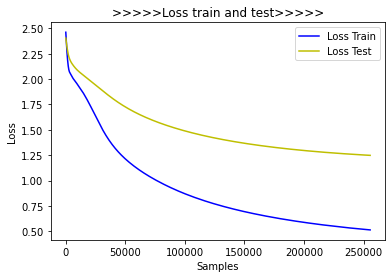

Accuracy de validación con kFold 0.6254340277777778
Accuracy Train: 0.6645 
Accuracy Test: 0.649 
Diferencia entre train y test: 0.015499999999999958

 


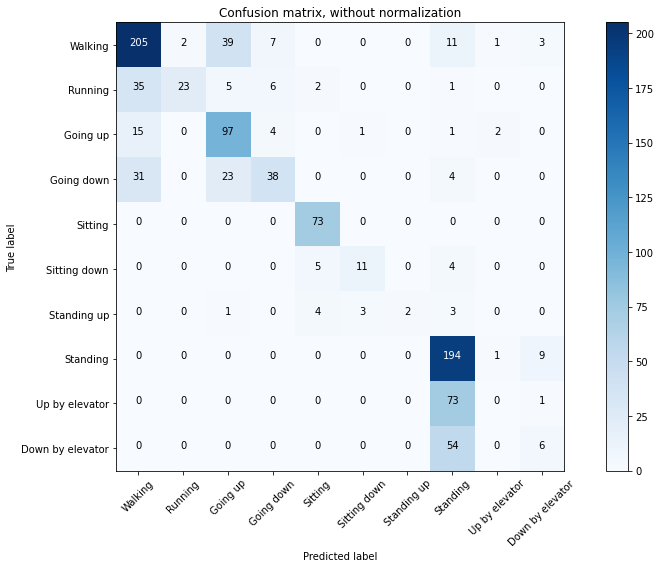

loss 0.52918 acc 0.58945: 100%|█████████▉| 499/500 [00:37<00:00, 12.82it/s]

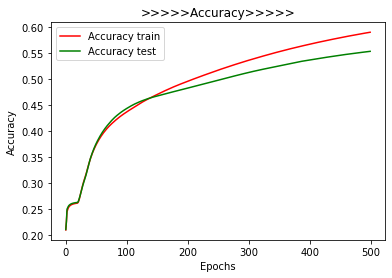

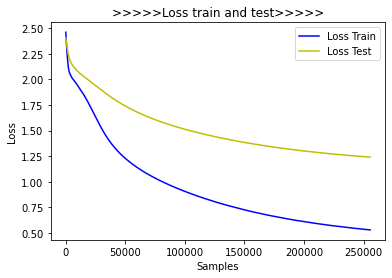

Accuracy de validación con kFold 0.6251627604166667
Accuracy Train: 0.6745 
Accuracy Test: 0.665 
Diferencia entre train y test: 0.009499999999999953

 


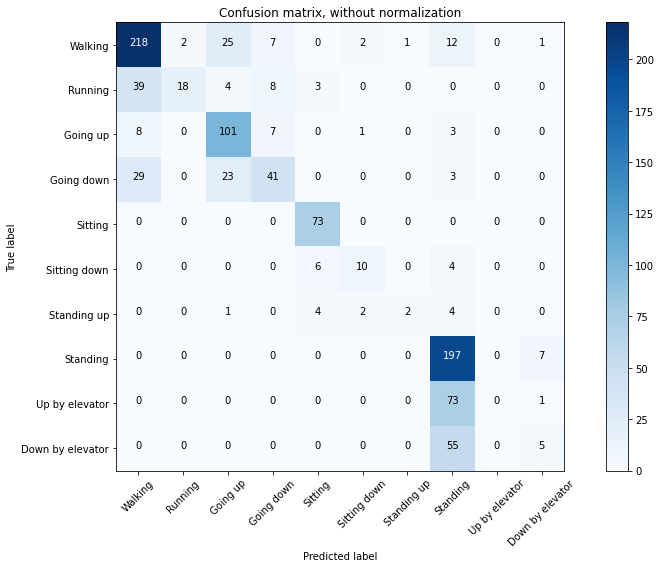

loss 0.53864 acc 0.58118: 100%|██████████| 500/500 [00:37<00:00, 12.15it/s]

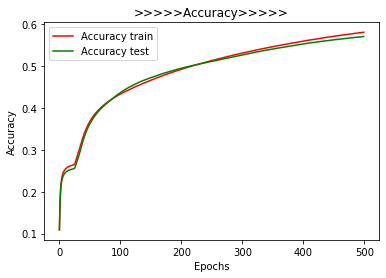

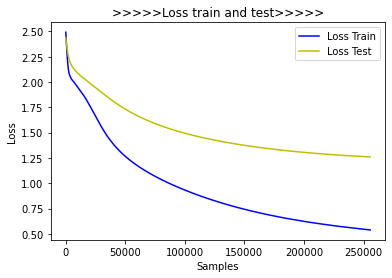

Accuracy de validación con kFold 0.6290798611111111
Accuracy Train: 0.668 
Accuracy Test: 0.653 
Diferencia entre train y test: 0.015000000000000013

 


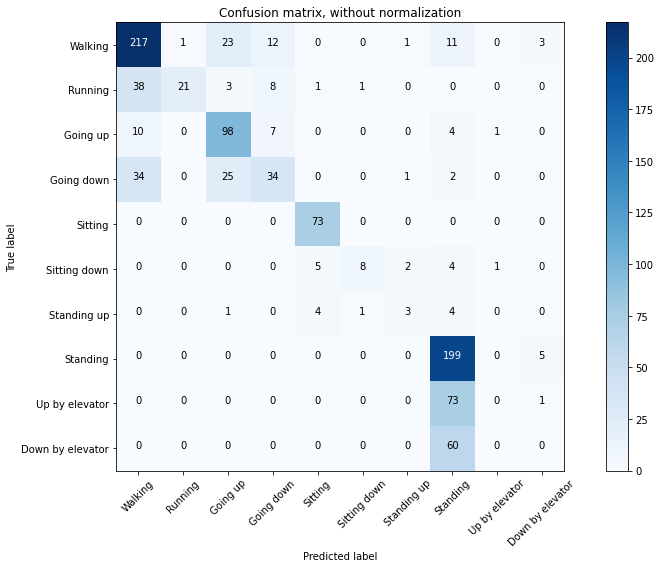

loss 0.52421 acc 0.59136: 100%|██████████| 500/500 [00:38<00:00, 13.11it/s]

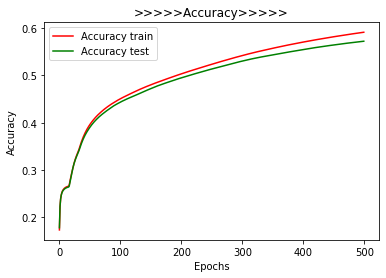

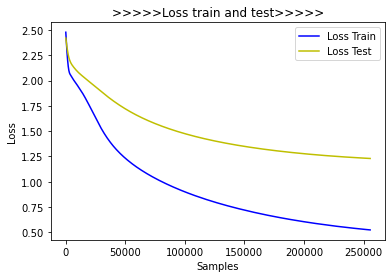

Accuracy de validación con kFold 0.632125289351852
Accuracy Train: 0.67775 
Accuracy Test: 0.667 
Diferencia entre train y test: 0.010749999999999926

 


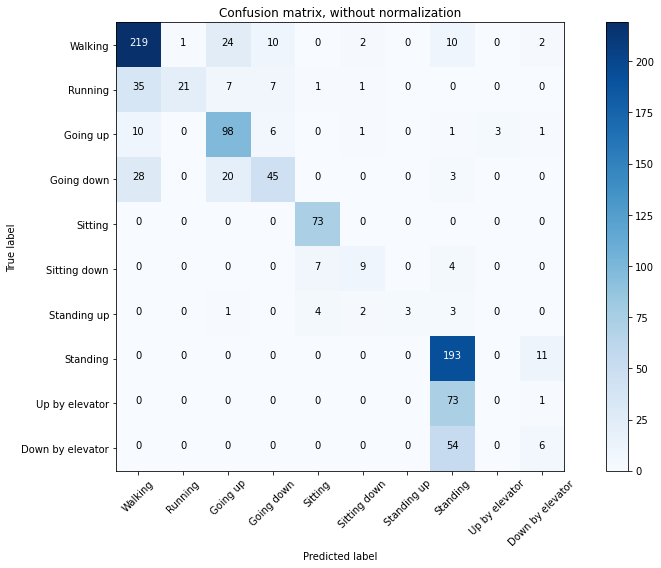

loss 0.54841 acc 0.57318: 100%|██████████| 500/500 [00:37<00:00, 12.83it/s]

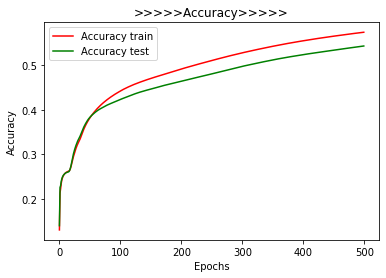

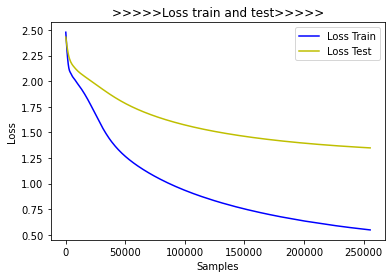

Accuracy de validación con kFold 0.6325334821428571
Accuracy Train: 0.65425 
Accuracy Test: 0.65 
Diferencia entre train y test: 0.004249999999999976

 


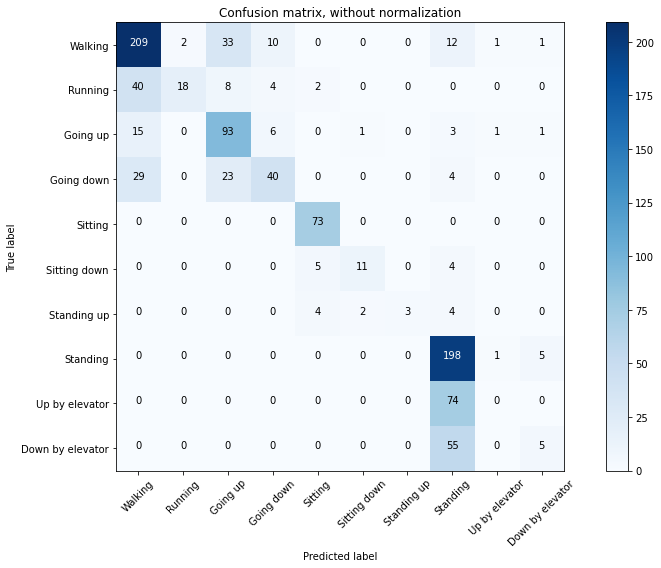

loss 0.52781 acc 0.57982: 100%|██████████| 500/500 [00:38<00:00, 11.72it/s]

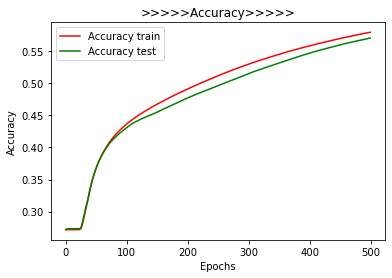

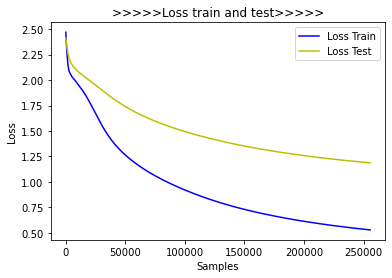

Accuracy de validación con kFold 0.6366373697916666
Accuracy Train: 0.666 
Accuracy Test: 0.654 
Diferencia entre train y test: 0.01200000000000001

 


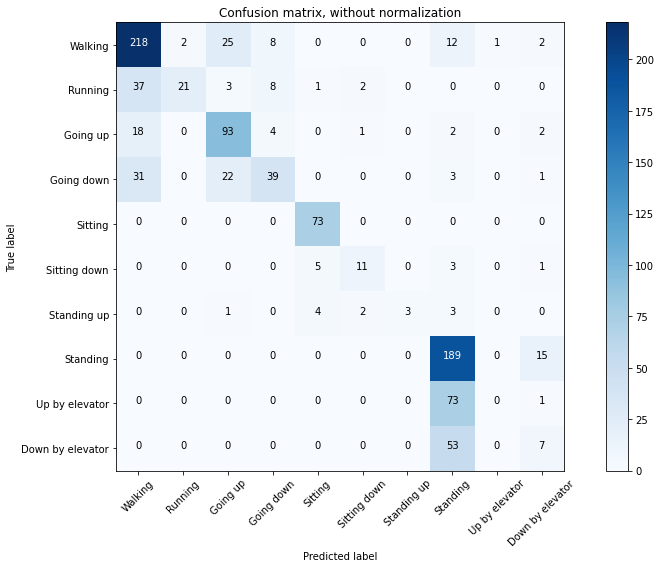

loss 0.54334 acc 0.58078: 100%|█████████▉| 499/500 [00:41<00:00, 11.76it/s]

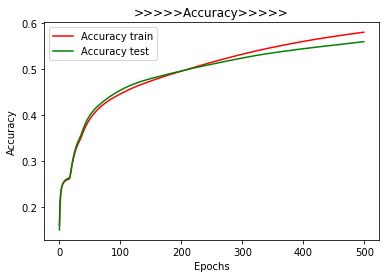

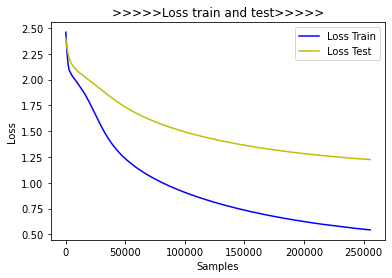

Accuracy de validación con kFold 0.6366222993827161
Accuracy Train: 0.66175 
Accuracy Test: 0.651 
Diferencia entre train y test: 0.010749999999999926

 


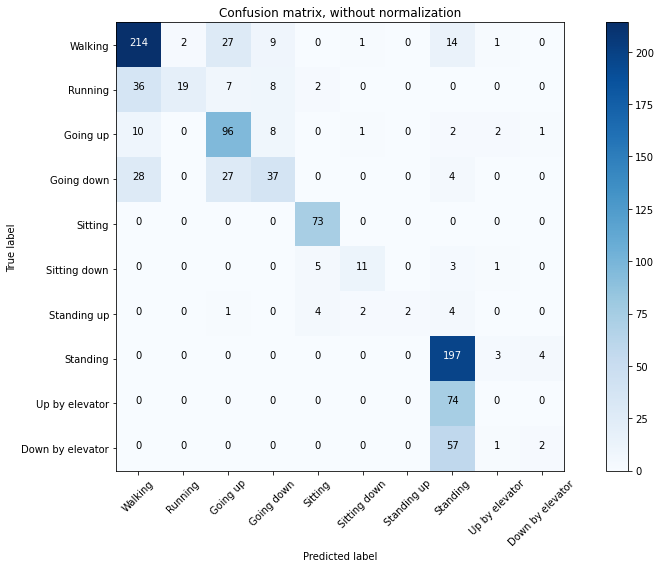

loss 0.52130 acc 0.58007: 100%|██████████| 500/500 [00:44<00:00, 11.26it/s]

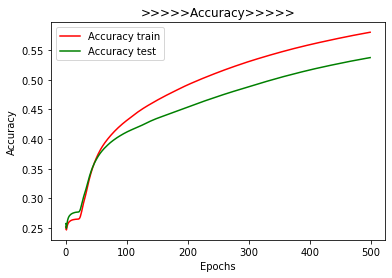

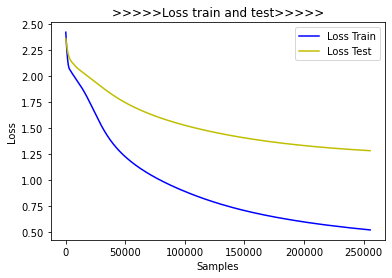

Accuracy de validación con kFold 0.6358289930555555
Accuracy Train: 0.66375 
Accuracy Test: 0.639 
Diferencia entre train y test: 0.02474999999999994

 


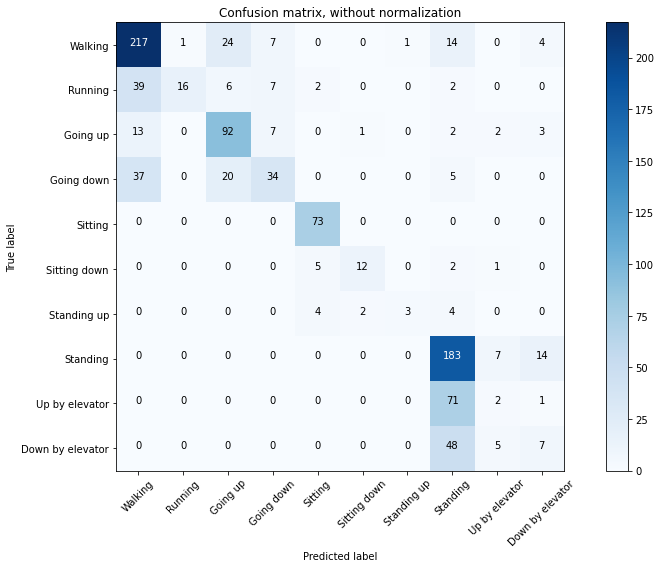

loss 2.34984 acc 0.26842:   0%|          | 1/500 [00:00<01:46,  4.66it/s]

Time: 7m 4.703125s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 550 Hidden neurons ============


loss 0.50167 acc 0.59843: 100%|██████████| 500/500 [00:40<00:00, 12.34it/s]

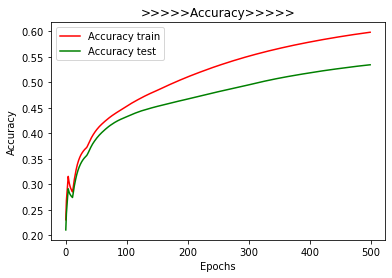

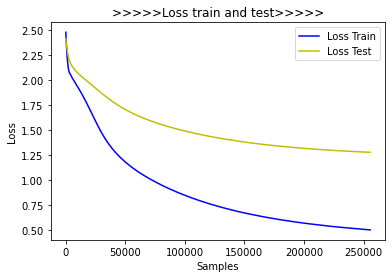

Accuracy de validación con kFold 0.5980902777777778
Accuracy Train: 0.66575 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.017749999999999932

 


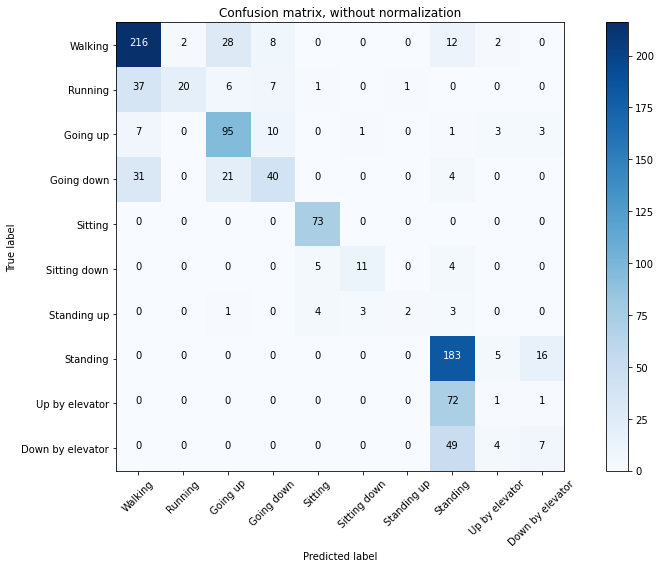

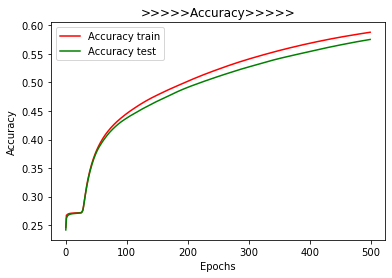

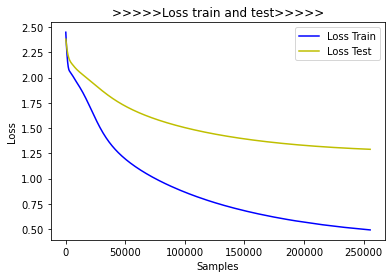

Accuracy de validación con kFold 0.6311848958333333
Accuracy Train: 0.6685 
Accuracy Test: 0.655 
Diferencia entre train y test: 0.013499999999999956

 


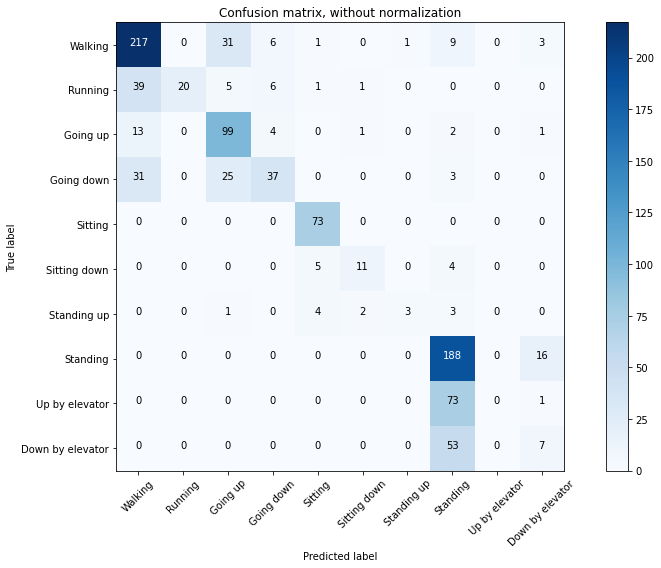

loss 0.52321 acc 0.59165: 100%|██████████| 500/500 [00:38<00:00, 13.06it/s]

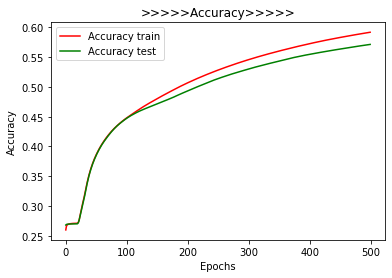

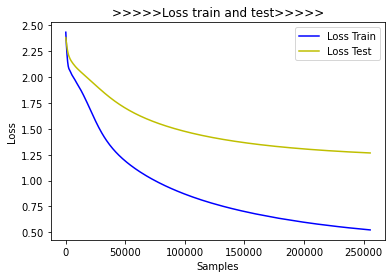

Accuracy de validación con kFold 0.6353443287037036
Accuracy Train: 0.667 
Accuracy Test: 0.661 
Diferencia entre train y test: 0.006000000000000005

 


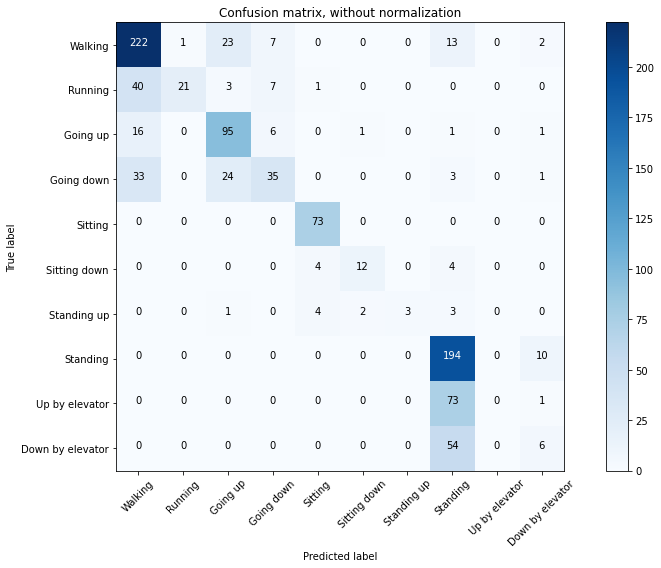

loss 0.50198 acc 0.59747: 100%|█████████▉| 499/500 [00:38<00:00, 13.43it/s]

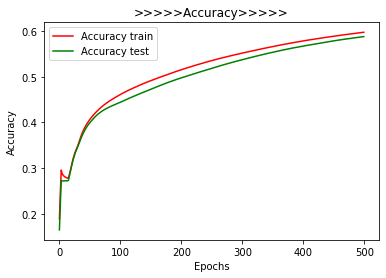

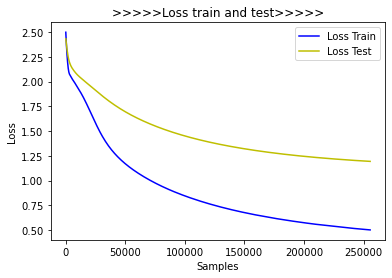

Accuracy de validación con kFold 0.6451822916666666
Accuracy Train: 0.67725 
Accuracy Test: 0.647 
Diferencia entre train y test: 0.03025

 


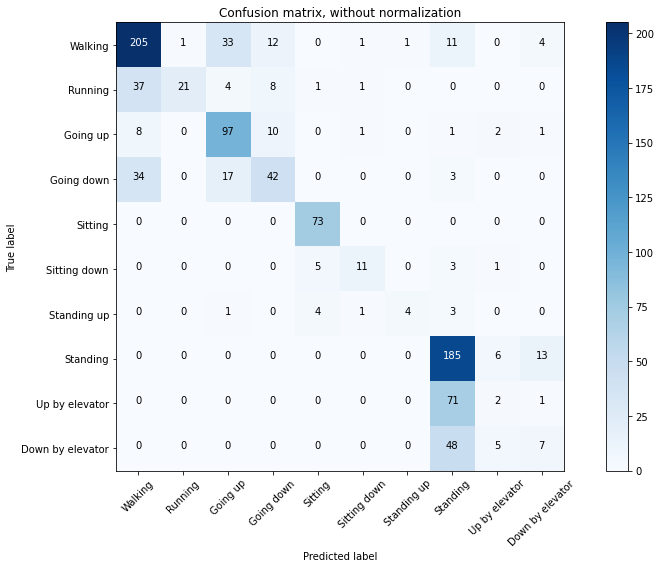

loss 0.50263 acc 0.59275: 100%|█████████▉| 499/500 [00:38<00:00, 13.07it/s]

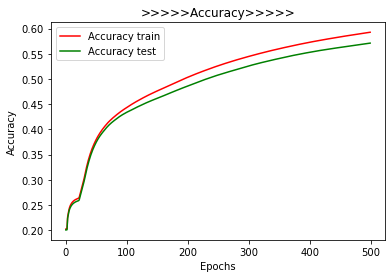

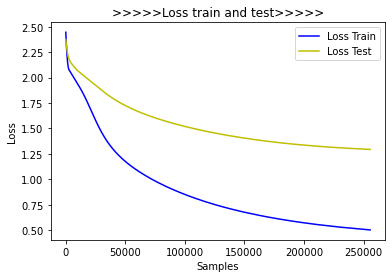

Accuracy de validación con kFold 0.646875
Accuracy Train: 0.67375 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.013749999999999929

 


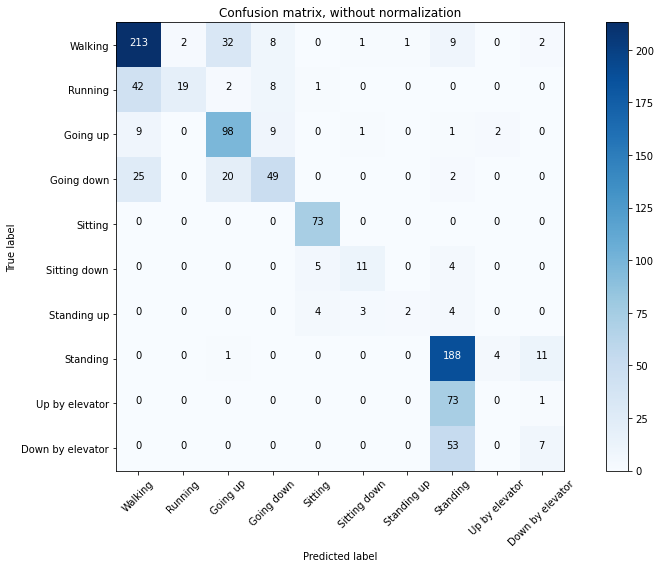

loss 0.48568 acc 0.59705: 100%|█████████▉| 499/500 [00:37<00:00, 13.63it/s]

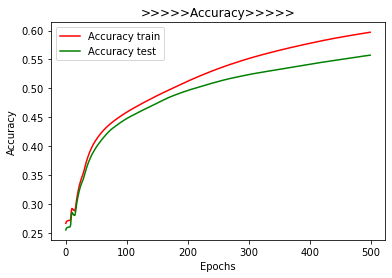

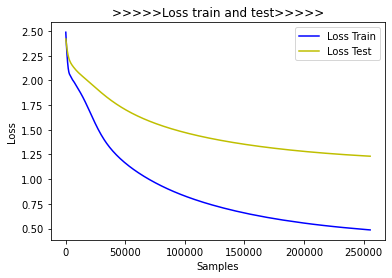

Accuracy de validación con kFold 0.6441695601851852
Accuracy Train: 0.67775 
Accuracy Test: 0.652 
Diferencia entre train y test: 0.02574999999999994

 


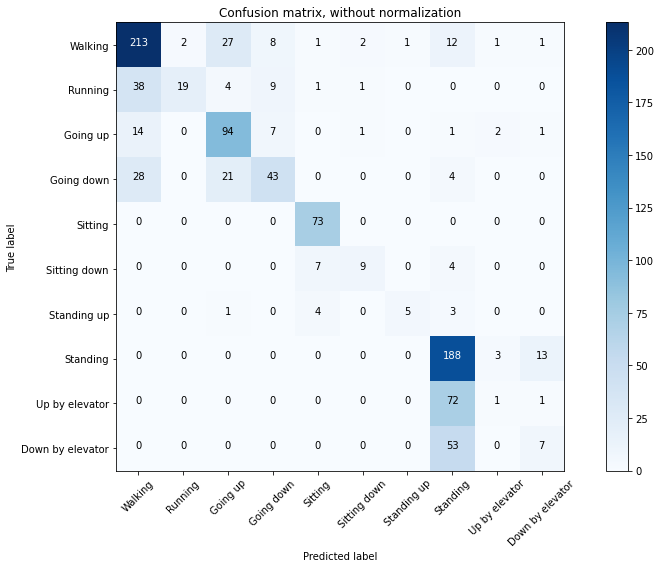

loss 0.48695 acc 0.59444: 100%|█████████▉| 499/500 [00:37<00:00, 13.21it/s]

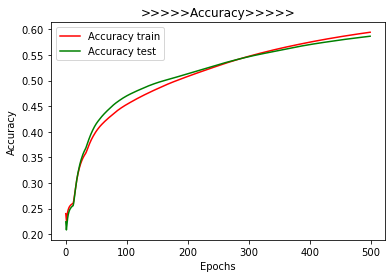

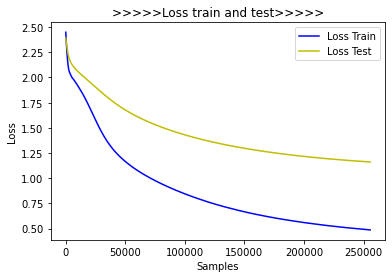

Accuracy de validación con kFold 0.6459883432539683
Accuracy Train: 0.66925 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.011249999999999982

 


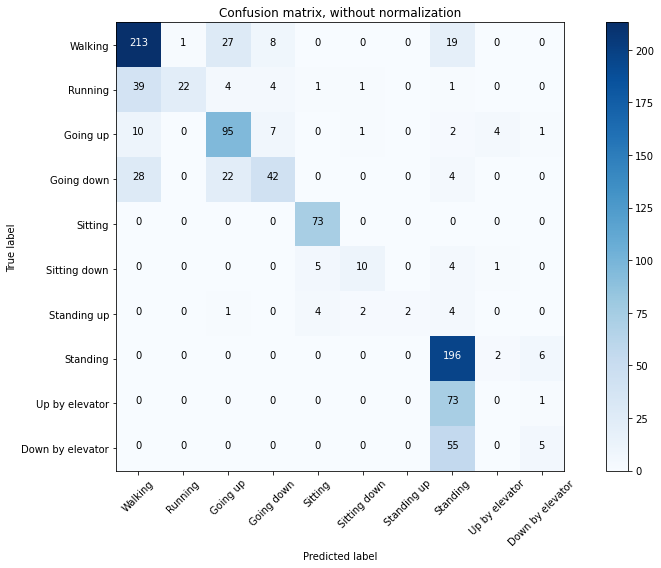

loss 0.51524 acc 0.58568: 100%|█████████▉| 499/500 [00:38<00:00, 13.50it/s]

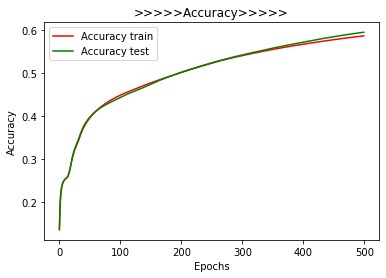

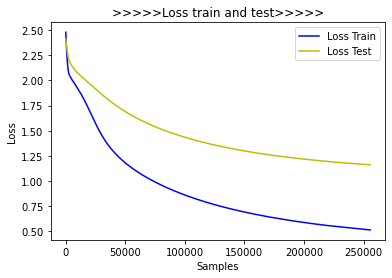

Accuracy de validación con kFold 0.6508517795138888
Accuracy Train: 0.6675 
Accuracy Test: 0.649 
Diferencia entre train y test: 0.01849999999999996

 


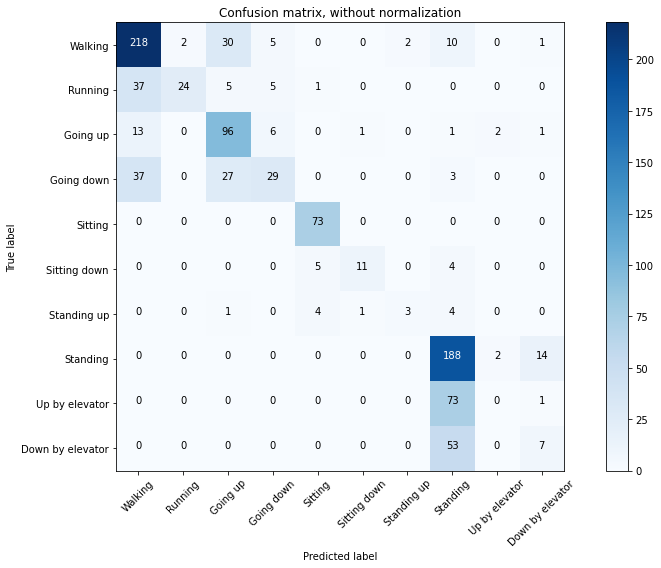

loss 0.48753 acc 0.59426: 100%|██████████| 500/500 [00:38<00:00, 12.95it/s]

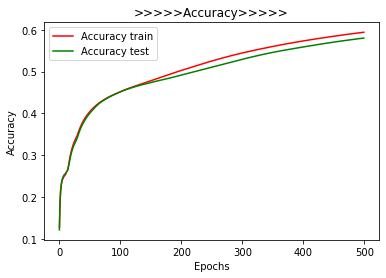

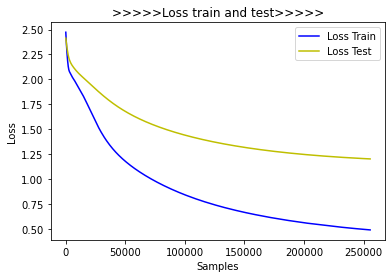

Accuracy de validación con kFold 0.6526331018518517
Accuracy Train: 0.67875 
Accuracy Test: 0.649 
Diferencia entre train y test: 0.029749999999999943

 


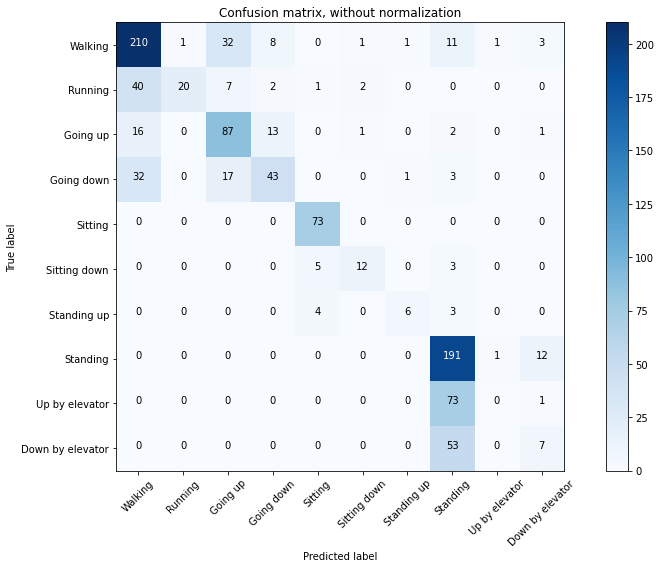

loss 0.49598 acc 0.59926: 100%|██████████| 500/500 [00:39<00:00, 12.70it/s]

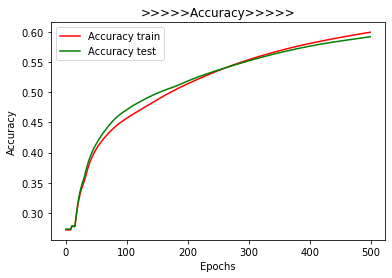

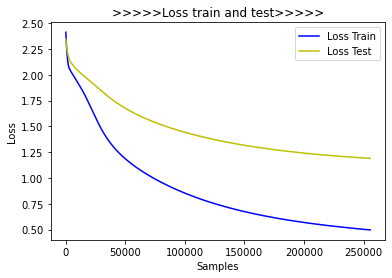

Accuracy de validación con kFold 0.6535373263888888
Accuracy Train: 0.6815 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.021499999999999964

 


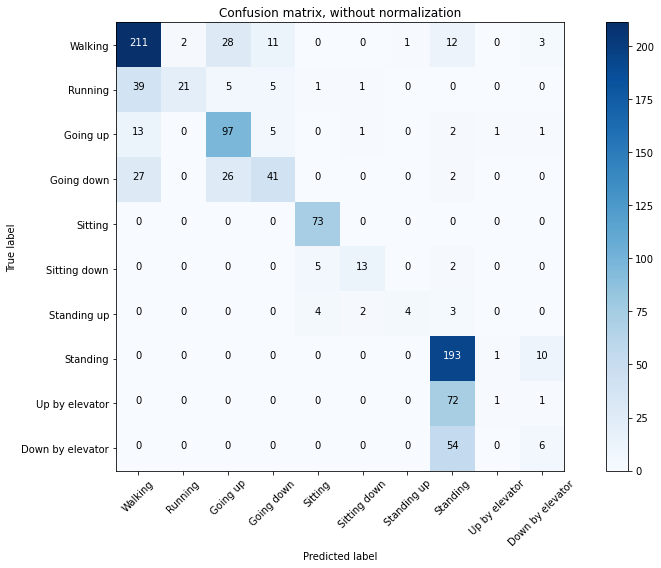

loss 2.28080 acc 0.19876:   0%|          | 1/500 [00:00<01:37,  5.12it/s]

Time: 7m 0.921875s
============ Launch with 5000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 650 Hidden neurons ============


loss 0.49346 acc 0.60246: 100%|██████████| 500/500 [00:39<00:00, 12.41it/s]

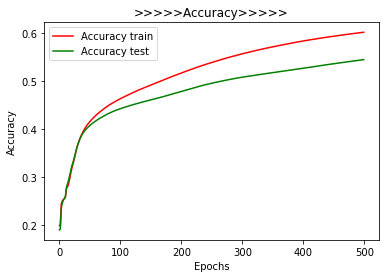

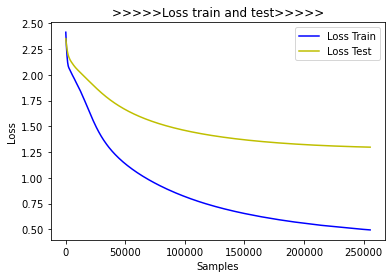

Accuracy de validación con kFold 0.6295572916666667
Accuracy Train: 0.6745 
Accuracy Test: 0.66 
Diferencia entre train y test: 0.014499999999999957

 


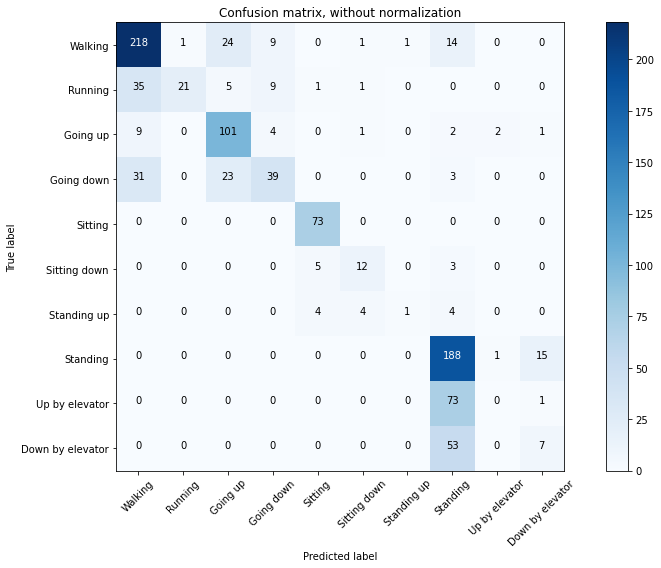

loss 0.48759 acc 0.59636: 100%|█████████▉| 499/500 [00:38<00:00, 13.38it/s]

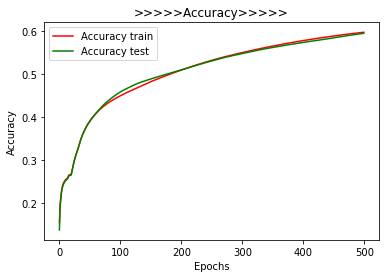

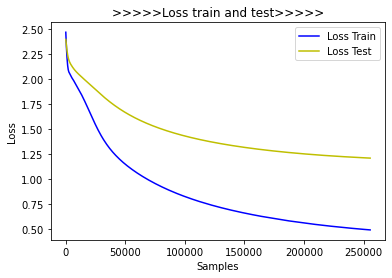

Accuracy de validación con kFold 0.659396701388889
Accuracy Train: 0.67125 
Accuracy Test: 0.658 
Diferencia entre train y test: 0.013249999999999984

 


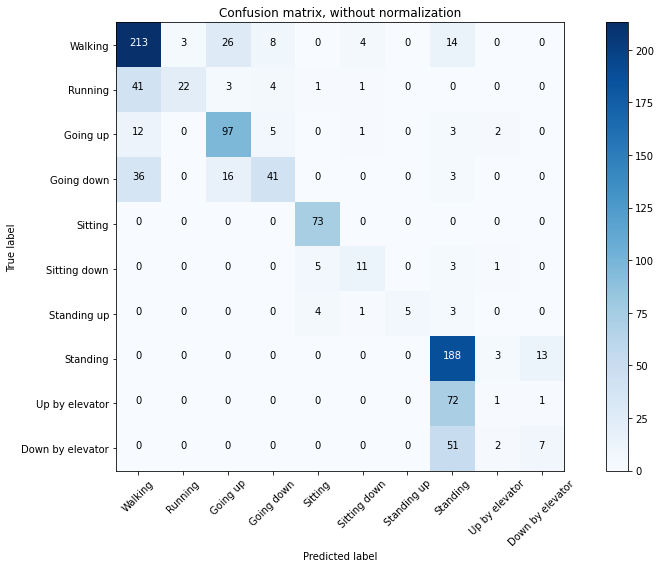

loss 0.46951 acc 0.59971: 100%|██████████| 500/500 [00:37<00:00, 13.16it/s]

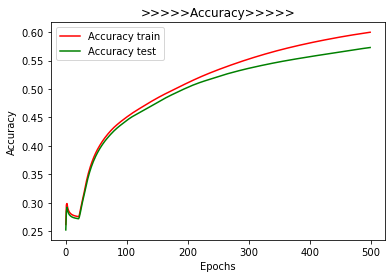

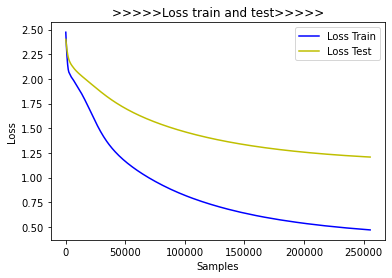

Accuracy de validación con kFold 0.6553819444444445
Accuracy Train: 0.675 
Accuracy Test: 0.653 
Diferencia entre train y test: 0.02200000000000002

 


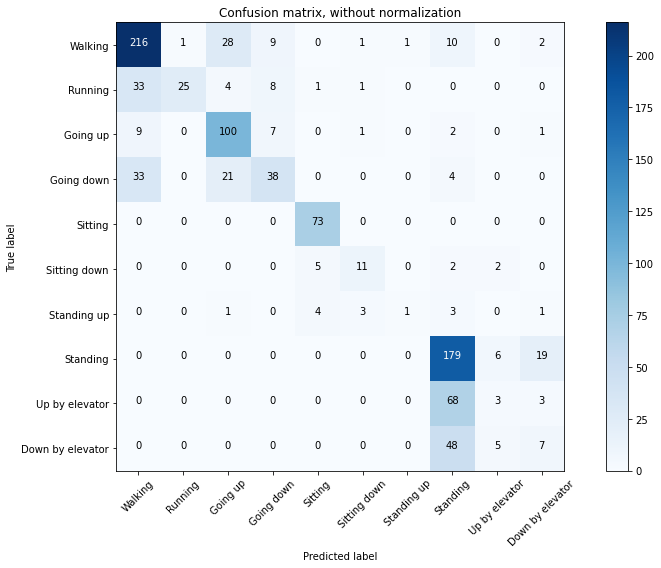

loss 0.48647 acc 0.60270: 100%|██████████| 500/500 [00:37<00:00, 13.24it/s]

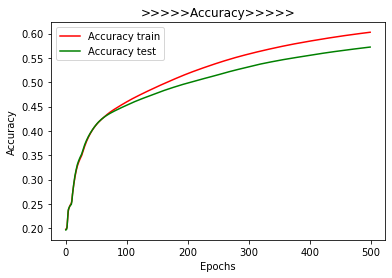

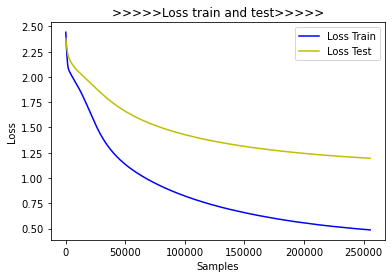

Accuracy de validación con kFold 0.6526150173611112
Accuracy Train: 0.67425 
Accuracy Test: 0.654 
Diferencia entre train y test: 0.02024999999999999

 


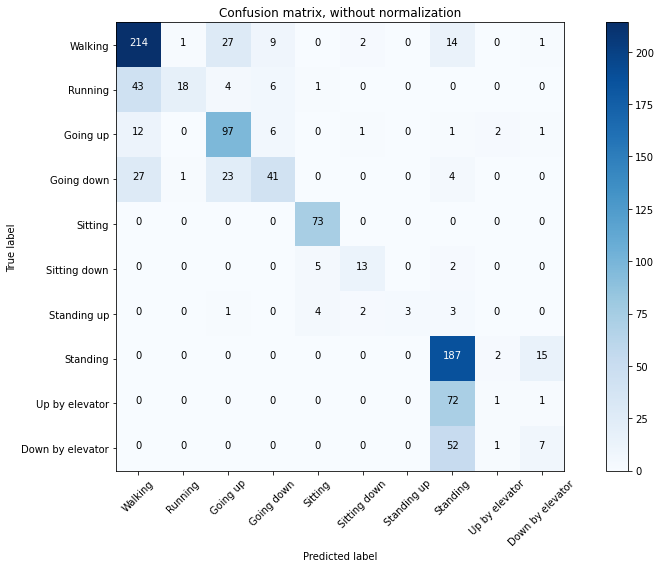

loss 0.47110 acc 0.60886: 100%|██████████| 500/500 [00:37<00:00, 13.18it/s]

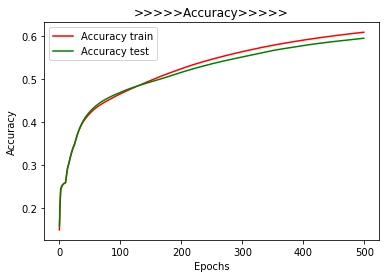

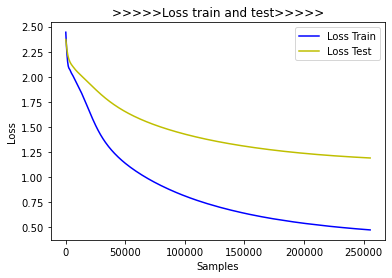

Accuracy de validación con kFold 0.6562934027777778
Accuracy Train: 0.6805 
Accuracy Test: 0.671 
Diferencia entre train y test: 0.009499999999999953

 


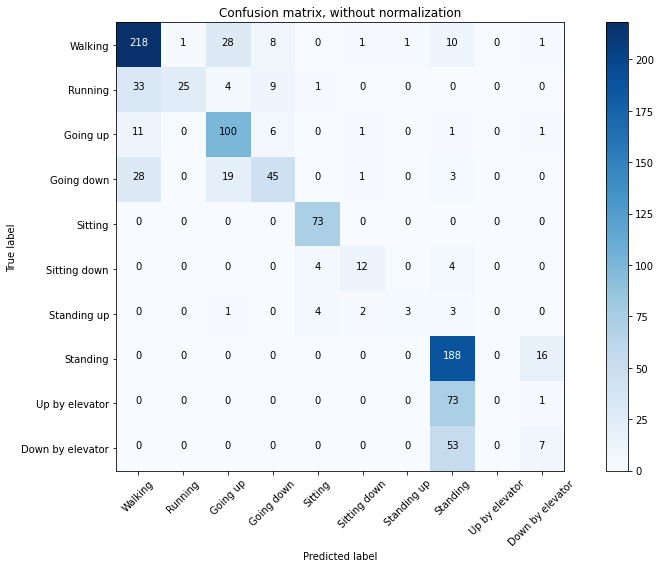

loss 0.47584 acc 0.58959: 100%|██████████| 500/500 [00:37<00:00, 13.20it/s]

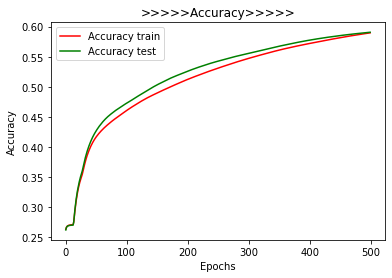

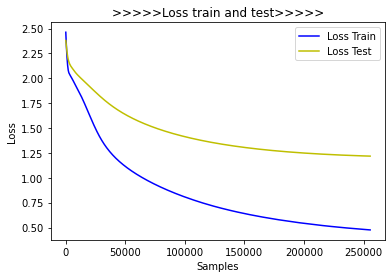

Accuracy de validación con kFold 0.6527416087962964
Accuracy Train: 0.66025 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.012249999999999983

 


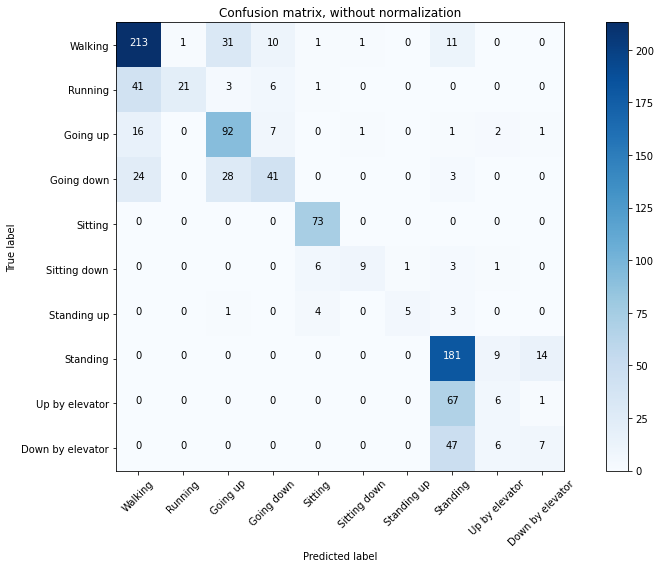

loss 0.44477 acc 0.60465: 100%|██████████| 500/500 [00:37<00:00, 13.29it/s]

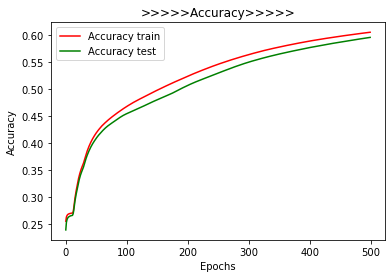

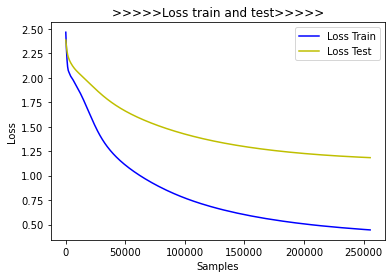

Accuracy de validación con kFold 0.6565290178571429
Accuracy Train: 0.67825 
Accuracy Test: 0.67 
Diferencia entre train y test: 0.00824999999999998

 


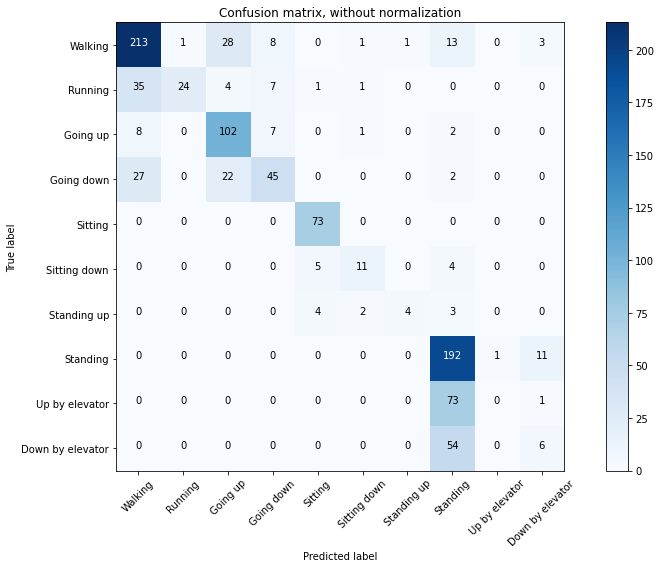

loss 0.49856 acc 0.59298: 100%|██████████| 500/500 [00:37<00:00, 13.35it/s]

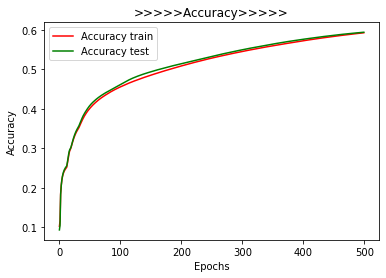

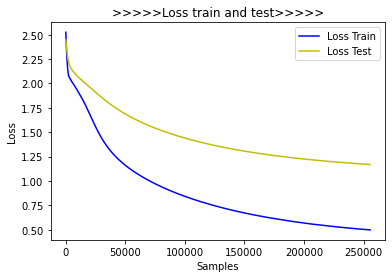

Accuracy de validación con kFold 0.6572265625
Accuracy Train: 0.672 
Accuracy Test: 0.646 
Diferencia entre train y test: 0.026000000000000023

 


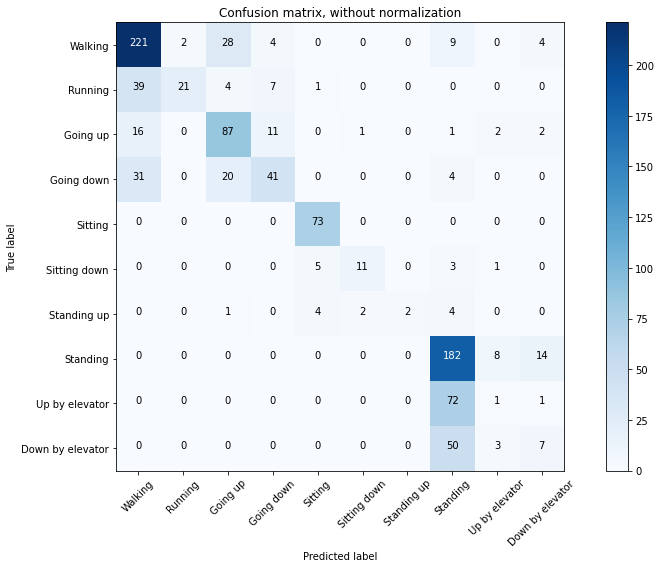

loss 0.51562 acc 0.59637: 100%|█████████▉| 499/500 [00:37<00:00, 13.14it/s]

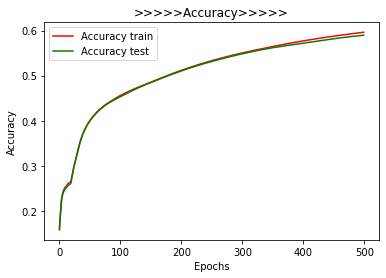

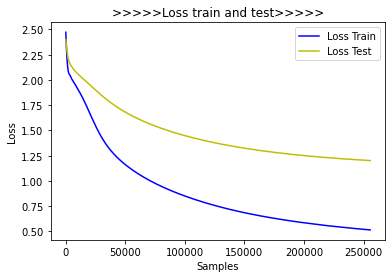

Accuracy de validación con kFold 0.6576967592592592
Accuracy Train: 0.671 
Accuracy Test: 0.645 
Diferencia entre train y test: 0.026000000000000023

 


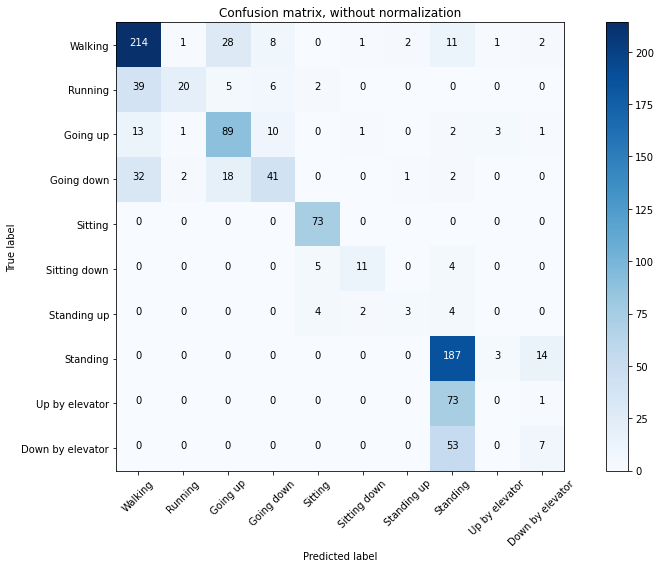

loss 0.46746 acc 0.60654: 100%|█████████▉| 499/500 [00:38<00:00, 12.97it/s]

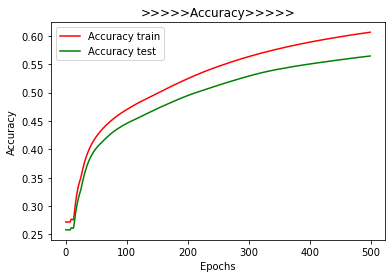

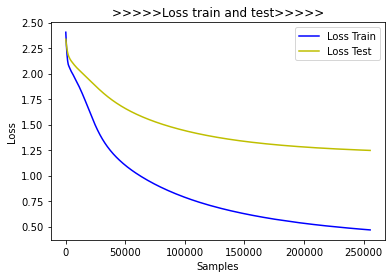

Accuracy de validación con kFold 0.6548828125
Accuracy Train: 0.66875 
Accuracy Test: 0.648 
Diferencia entre train y test: 0.020749999999999935

 


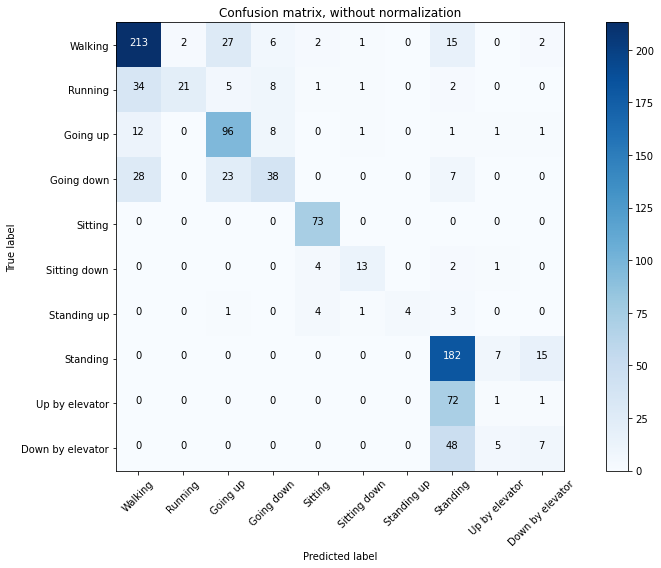

Time: 6m 55.84375s


In [17]:
list_times, list_neuron, list_acc_test = [], [], []
for hidden_size in range(50, 650+1, 100):
    print(f'\033[1;36m============ Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size} Batch, {num_splits} Splits, {learning_rate} lr, {hidden_size} Hidden neurons ============\033[0;m')
    #  Llamo al metodo que implementa el K-fold
    time_mean, modelo_trained, loss_test_list, acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                                   y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                                   learning_rate, (X_test, y_test), modelo_pre_train)
    list_times.append(time_mean)
    list_neuron.append(hidden_size)
    list_acc_test.append(acc_test)
list_times = [z * int(1e9) for z in list_times]

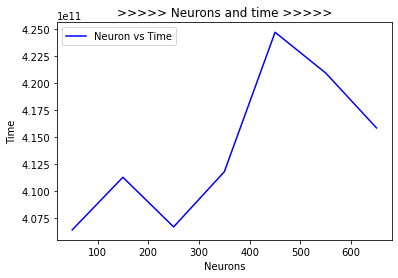

In [18]:
plt.plot(list_neuron,list_times,"b")
plt.legend(['Neuron vs Time'])
plt.xlabel('Neurons')
plt.ylabel('Time')
plt.title('>>>>> Neurons and time >>>>>')
plt.show()

In [19]:
list_times

[406406250000.0,
 411281250000.0,
 406687500000.0,
 411796875000.0,
 424703125000.0,
 420921875000.0,
 415843750000.0]

[0.5391000000000001, 0.6068999999999999, 0.6355999999999999, 0.6455, 0.6527999999999999, 0.6538999999999999, 0.6552999999999999]


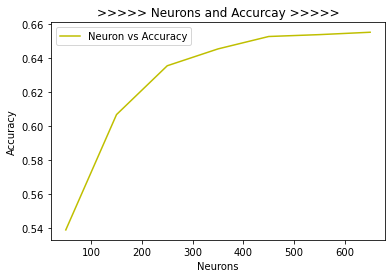

In [20]:
print(list_acc_test)
plt.plot(list_neuron, list_acc_test, "y")
plt.legend(['Neuron vs Accuracy'])
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('>>>>> Neurons and Accurcay >>>>>')
plt.show()


In [21]:
# # Muestro el tiempo medio del entrenamiento de mi red neuronal 
# if(time_mean> 3600):
#     print(f'\nTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s')
# elif(time_mean> 60):
#     print(f'\nTime: {int(time_mean /60)}m {time_mean%60}s')
# else:
#     print(f'\nTime: {time_mean}')


In [22]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.6570252557544758


In [23]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()